**Business Understanding**

Civic Insights Consulting empowers political campaigns with data-driven strategies, focusing on a mayoral candidate in Seattle to align campaign messages with community values and needs.

Our project develops a classifier to predict Terry Stops outcomes in Seattle, aiming to reveal trends in law enforcement and inform policy reforms for a safer, more equitable community

**Data Understanding & Prep**

**1. Data Selection and Cleaning**

Carefully chosen key features for analysis, including 'Year', 'Month', 'Time of Day', 'Initial and Final Call Types', 'Officer and Subject Demographics', 'Weapon Type', and 'Stop Resolution';
Executed thorough data cleaning and organization to ensure accuracy and relevance

**2. Feature Engineering and Preprocessing**

Applied OneHotEncoding and OrdinalCoding to transform categorical data for analytical compatibility;
Utilized 'dropna' technique to maintain data integrity and reliability

**3. Addressing Data Imbalance**

Recognized and addressed the imbalance in the 'Stop Resolution' target variable;
Employed oversampling, class weights, and SMOTE strategies to achieve a more balanced dataset for unbiased insights

**4. Preparation for Predictive Modeling**

Transformed and structured data to feed into our sophisticated classifier;
Ensured data preparation aligns with our objective of delivering actionable and equitable public safety solutions

**I. Dataset Preparation**

Part 1: Data Cleaning and Preprocessing


**II. Modeling and Evaluation**

Part 2: Baseline Classifier (Dummy Model)

Part 3: Logistic Regression

Part 4: Decision Trees

Part 5: Random Forest

Part 6: Gradient Boosting Machines (GBM)

Part 7: Support Vector Machine (rbf, linear, polynomial)

Part 8: AdaBoost (Decision Trees, Logistic Regression)

Part 9: k-NN

Part 10: Ensemble Methods


**III. Interpretation**

Part 11: Interpretation using Partial Dependence Plots (PDPs)

**Part 1: Data Cleaning and Preprocessing**

Import Pandas to read the csv file.

In [2]:
import pandas as pd
from datetime import datetime
df = pd.read_csv("Terry_Stops_20231222.csv")

Creating a new dataframe that includes the target and independent variables:

In [3]:
Relevant_columns = [
    'Subject Age Group', 'Officer YOB', 'Officer Gender', 'Officer Race',
    'Subject Perceived Race', 'Subject Perceived Gender', 'Initial Call Type',
    'Final Call Type', 'Call Type', 'Weapon Type', 'Reported Date','Reported Time','Stop Resolution'
]
df_1 = df[Relevant_columns]
df_1_1 = df_1[df_1['Subject Age Group'] != "-"]
df_1_1.head()

# Convert 'Reported Date' to DateTime format
df_1_1['Reported Date'] = pd.to_datetime(df_1_1['Reported Date'])

# Extracting Year, Month, Day, and Day of Week
df_1_1['Year'] = df_1_1['Reported Date'].dt.year
df_1_1['Month'] = df_1_1['Reported Date'].dt.month
df_1_1['Day'] = df_1_1['Reported Date'].dt.day
df_1_1.drop('Reported Date', axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Cleaning up the formats of date/time

In [4]:
def categorize_time_of_day(time_str):
    time = datetime.strptime(time_str, '%H:%M:%S.%f0000').time()
    hour = time.hour

    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the 'Reported Time' column
df_1_1['Time of Day'] = df_1_1['Reported Time'].apply(categorize_time_of_day)
df_1_1.drop('Reported Time', axis=1, inplace=True)
df_1_1.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Subject Age Group,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Call Type,Weapon Type,Stop Resolution,Year,Month,Day,Time of Day
0,46 - 55,1965,M,Asian,White,Male,ASLT - IP/JO - DV,--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),911,-,Field Contact,2019,7,18,Night
1,18 - 25,1985,F,White,White,Female,TRESPASS,--PROWLER - TRESPASS,911,NaN,Offense Report,2015,10,16,Afternoon
2,46 - 55,1979,M,White,White,Male,DOWN - CHECK FOR DOWN PERSON,--ASSIST PUBLIC - OTHER (NON-SPECIFIED),911,-,Field Contact,2021,3,4,Morning
3,36 - 45,1955,M,Hispanic or Latino,Black or African American,Male,SEX IN PUBLIC PLACE/VIEW (INCL MASTURBATION),--CRISIS COMPLAINT - GENERAL,"TELEPHONE OTHER, NOT 911",NaN,Offense Report,2018,5,16,Afternoon
4,56 and Above,1974,M,White,White,Male,TRESPASS,--PROWLER - TRESPASS,911,-,Arrest,2019,5,26,Morning


Calculating officer's age based on 'YOB' and 'Year'.

In [5]:
df_1_1['Officer Age'] = df_1_1['Year'] - df_1_1['Officer YOB']
df_1_1.drop('Officer YOB', axis=1, inplace=True)
df_1_1.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Subject Age Group,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Call Type,Weapon Type,Stop Resolution,Year,Month,Day,Time of Day,Officer Age
0,46 - 55,M,Asian,White,Male,ASLT - IP/JO - DV,--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),911,-,Field Contact,2019,7,18,Night,54
1,18 - 25,F,White,White,Female,TRESPASS,--PROWLER - TRESPASS,911,NaN,Offense Report,2015,10,16,Afternoon,30
2,46 - 55,M,White,White,Male,DOWN - CHECK FOR DOWN PERSON,--ASSIST PUBLIC - OTHER (NON-SPECIFIED),911,-,Field Contact,2021,3,4,Morning,42
3,36 - 45,M,Hispanic or Latino,Black or African American,Male,SEX IN PUBLIC PLACE/VIEW (INCL MASTURBATION),--CRISIS COMPLAINT - GENERAL,"TELEPHONE OTHER, NOT 911",NaN,Offense Report,2018,5,16,Afternoon,63
4,56 and Above,M,White,White,Male,TRESPASS,--PROWLER - TRESPASS,911,-,Arrest,2019,5,26,Morning,45


Clean up columns 'Officer Gender', 'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender'

In [6]:
df_1_1 = df_1_1[df_1_1['Officer Gender'] != "N"]

In [7]:
df_1_1 = df_1_1[df_1_1['Officer Race'] != "Not Specified"]
df_1_1 = df_1_1[df_1_1['Officer Race'] != "Unknown"]

In [8]:
df_1_1 = df_1_1[df_1_1['Subject Perceived Race'] != "Unknown"]
df_1_1 = df_1_1[df_1_1['Subject Perceived Race'] != "-"]
df_1_1 = df_1_1[df_1_1['Subject Perceived Race'] != "Other"]
df_1_1 = df_1_1[df_1_1['Subject Perceived Race'] != "DUPLICATE"]

In [9]:
df_1_1 = df_1_1[df_1_1['Subject Perceived Gender'] != "Unable to Determine"]
df_1_1 = df_1_1[df_1_1['Subject Perceived Gender'] != "-"]
df_1_1 = df_1_1[df_1_1['Subject Perceived Gender'] != "Unknown"]
df_1_1 = df_1_1[df_1_1['Subject Perceived Gender'] != "DUPLICATE"]
df_1_1['Subject Perceived Gender'].value_counts()

Subject Perceived Gender
Male                                                         38913
Female                                                        9658
Gender Diverse (gender non-conforming and/or transgender)       26
Name: count, dtype: int64

Combine some features/Organize categories

In [10]:
def group_call_types(call_type):
    if 'BURG' in call_type:
        return 'BURGLARY'
    elif 'DIST' in call_type:
        return 'DISTURBANCE'
    elif call_type in ['ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)', 
                       'ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS)', 
                       'ASLT - IP/JO - DV']:
        return 'ASSAULT - WITH OR W/O WPNS (NO SHOOTINGS)'
    else:
        return call_type

# Apply the function to the 'Initial Call Type' column
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type'].apply(group_call_types)

# Check the new distribution of 'Initial Call Type Grouped'
grouped_call_type_counts = df_1_1['Initial Call Type Grouped'].value_counts()
grouped_call_type_counts.head(40)

Initial Call Type Grouped
-                                                   11466
DISTURBANCE                                          4952
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW           3578
ASSAULT - WITH OR W/O WPNS (NO SHOOTINGS)            3431
SUSPICIOUS PERSON, VEHICLE OR INCIDENT               3348
BURGLARY                                             2457
TRESPASS                                             2000
SHOPLIFT - THEFT                                     1525
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)            1440
FIGHT - IP - PHYSICAL (NO WEAPONS)                   1260
ROBBERY - IP/JO (INCLUDES STRONG ARM)                 969
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)      925
AUTO RECOVERY                                         917
THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)         902
TRAFFIC STOP - OFFICER INITIATED ONVIEW               722
PROPERTY - DAMAGE                                     703
ASLT - IP/JO - PERSON SHOT OR SHOT AT         

In [11]:
df_1_1['Weapon Type'] = df_1_1['Weapon Type'].fillna('No Weapons')
df_1_1['Weapon Type'] = df_1_1['Weapon Type'].replace('-', 'Data Missing')

In [12]:
# 1. Combining "Lethal Cutting Instrument" and "Knife/Cutting/Stabbing Instrument" into "Cutting/Stabbing Instrument"
cutting_instruments = ['Lethal Cutting Instrument', 'Knife/Cutting/Stabbing Instrument']
df_1_1['Weapon Type'] = df_1_1['Weapon Type'].replace(cutting_instruments, 'Cutting/Stabbing Instrument')

# 2. Combining various firearm types into "Firearm"
firearm_types = ['Handgun', 'Firearm Other', 'Firearm', 'Other Firearm', 'Firearm (unk type)', 'Rifle', 'Shotgun', 'Automatic Handgun']
df_1_1['Weapon Type'] = df_1_1['Weapon Type'].replace(firearm_types, 'Firearm')

# 3. Combining "Club, Blackjack, Brass Knuckles", "Club", "Blackjack", "Brass Knuckles" into "Club, Blackjack, Brass Knuckles"
club_types = ['Club, Blackjack, Brass Knuckles', 'Club', 'Blackjack', 'Brass Knuckles']
df_1_1['Weapon Type'] = df_1_1['Weapon Type'].replace(club_types, 'Club, Blackjack, Brass Knuckles')

# 4. Combining "None/Not Applicable" and "No Weapons" into "No Weapons"
no_weapon_types = ['None/Not Applicable', 'No Weapons']
df_1_1['Weapon Type'] = df_1_1['Weapon Type'].replace(no_weapon_types, 'No Weapons')
df_1_1['Weapon Type'].value_counts()

Weapon Type
No Weapons                              28447
Data Missing                            17064
Cutting/Stabbing Instrument              2283
Firearm                                   557
Blunt Object/Striking Implement           125
Club, Blackjack, Brass Knuckles            52
Mace/Pepper Spray                          41
Taser/Stun Gun                             14
Fire/Incendiary Device                     12
Personal Weapons (hands, feet, etc.)        2
Name: count, dtype: int64

In [13]:
fight_without_weapons = ["FIGHT - IP - PHYSICAL (NO WEAPONS)", "FIGHT - VERBAL/ORAL (NO WEAPONS)", "FIGHT - JO - PHYSICAL (NO WEAPONS)"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(fight_without_weapons, "Fight without Weapons")

# Combining "FIGHT - IP/JO - WITH WEAPONS" into "Fight with Weapons"
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace("FIGHT - IP/JO - WITH WEAPONS", "Fight with Weapons")

assault_combine = ["ASLT - DV", "ASSAULT - WITH OR W/O WPNS (NO SHOOTINGS)"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(assault_combine, "Assault with or without weapons (No shootings)")

# Renaming "ASLT - IP/JO - PERSON SHOT OR SHOT AT" to "Assault with shooting"
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace("ASLT - IP/JO - PERSON SHOT OR SHOT AT", "Assault with shooting")

traffic_incident_categories = ["DUI - DRIVING UNDER INFLUENCE", 
                               "MVC - HIT AND RUN (NON INJURY), INCLUDES IP/JO",
                               "MVC - WITH INJURIES (INCLUDES HIT AND RUN)"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(traffic_incident_categories, 
                                                              "Traffic Incidents - DUI and MVC Involving Hit and Run/Injuries")

robbery_categories = ["ROBBERY - IP/JO (INCLUDES STRONG ARM)", "ROBBERY (INCLUDES STRONG ARM)"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(robbery_categories, "Robbery (Includes Strong Arm)")

theft_categories = ["SHOPLIFT - THEFT", "AUTO THEFT-IP/JO - VEHICLE, PLATES, TABS","AUTO THEFT - VEH THEFT OR THEFT & RECOVERY","THEFT OF SERVICES","THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(theft_categories, "Theft (Including Shoplift)")

unlawful_entry_categories = ["BURGLARY", "TRESPASS"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(unlawful_entry_categories, "Unlawful Entry (Burglary/Trespass)")

safety_threat_categories = ["HAZ - POTENTIAL THRT TO PHYS SAFETY (NO HAZMAT)", "THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(safety_threat_categories, "Potential Safety Threats (Physical/Verbal)")

property_related_categories = ["PROPERTY - DAMAGE", "AUTO RECOVERY", "PROWLER - IP/JO"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(property_related_categories, "Unlawful Entry (Burglary/Trespass)")

# Combining "DOWN - CHECK FOR PERSON DOWN", "SFD - ASSIST ON FIRE OR MEDIC RESPONSE", 
# "PERSON IN BEHAVIORAL/EMOTIONAL CRISIS", "SUICIDE - IP/JO SUICIDAL PERSON AND ATTEMPTS" into "Public Safety and Health"
public_safety_health_categories = ["DOWN - CHECK FOR PERSON DOWN", "DOWN - CHECK FOR DOWN PERSON", "SFD - ASSIST ON FIRE OR MEDIC RESPONSE",
                                   "PERSON IN BEHAVIORAL/EMOTIONAL CRISIS", "SUICIDE - IP/JO SUICIDAL PERSON AND ATTEMPTS"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(public_safety_health_categories, 
                                                              "Public Safety and Health")

# Combining "NUISANCE - MISCHIEF", "LEWD - (EXPOSING, FLASHING)", "BURN - RECKLESS BURNING" into "Public Order"
public_order_categories = ["NUISANCE - MISCHIEF", "LEWD - (EXPOSING, FLASHING)", "BURN - RECKLESS BURNING"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(public_order_categories, "Public Order")

# Combining into a single category "Warrant Pickup (Felony/Misdemeanor)"
warrant_categories = ["WARRANT - FELONY PICKUP", "WARRANT - MISD WARRANT PICKUP"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(warrant_categories, "Warrant Pickup (Felony/Misdemeanor)")

public_indecency_categories = ["SEX IN PUBLIC PLACE/VIEW (INCL MASTURBATION)", "LEWD - (EXPOSING, FLASHING)"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(public_indecency_categories, "Public Indecency")

# Combining "ORDER - VIOLATING DV COURT ORDER" and "ORDER - IP - VIOLATION OF DV COURT ORDER" into "DV Court Order Violations"
dv_court_order_violation_categories = ["ORDER - VIOLATING DV COURT ORDER", "ORDER - IP - VIOLATION OF DV COURT ORDER"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(dv_court_order_violation_categories, "DV Court Order Violations")

drug_related_categories = ["OVERDOSE - DRUG RELATED CASUALTY", "NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)"]
df_1_1['Initial Call Type Grouped'] = df_1_1['Initial Call Type Grouped'].replace(drug_related_categories, "Drug Related Incidents")

In [14]:
categories_to_remove = ["PARKING VIOLATION (EXCEPT ABANDONED CAR)", "DOA - CASUALTY, DEAD BODY","ASLT - PERSON SHOT OR SHOT AT","PURSE SNATCH - ROBBERY","URINATING, DEFECATING IN PUBLIC","ASSIST SPD - ROUTINE SERVICE","-ASSIGNED DUTY - FOOT BEAT (FROM ASSIGNED CAR)","SUICIDE, SUICIDAL PERSON AND ATTEMPTS","FIGHT - WITH WEAPONS","JUVENILE - RUNAWAY","PEDESTRIAN VIOLATIONS","NARCOTICS - FOUND","ALARM - COMM, HOLD-UP/PANIC (EXCEPT BANKS)","CHILD - IP/JO - LURING","SUSPICIOUS PACKAGE","FIREWORKS - NUISANCE (NO HAZARD)","PARKS VIOLATIONS/CITES (INCLUDES EXCLUSIONS)","MISSING - CHILD","LICENSE INSPECTIONS (CHECK FOR)","CARJACKING - ROBBERY"
]
df_1_1 = df_1_1[~df_1_1['Initial Call Type'].isin(categories_to_remove)]

In [15]:
categories_to_keep = ["Unlawful Entry (Burglary/Trespass)","DISTURBANCE","SUSPICIOUS STOP - OFFICER INITIATED ONVIEW","Assault with or without weapons (No shootings)","SUSPICIOUS PERSON, VEHICLE OR INCIDENT","Theft (Including Shoplift)","Fight without Weapons","Robbery (Includes Strong Arm)","Potential Safety Threats (Physical/Verbal)","Drug Related Incidents","Public Safety and Health","TRAFFIC STOP - OFFICER INITIATED ONVIEW","Public Order","Assault with shooting","Traffic Incidents - DUI and MVC Involving Hit and Run/Injuries","SHOTS - IP/JO - INCLUDES HEARD/NO ASSAULT","Fight with Weapons","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","Public Indecency","FRAUD - FORGERY,BUNCO, SCAMS, ID THEFT, ETC"
   
]

# Filtering the DataFrame
df_filtered = df_1_1[df_1_1['Initial Call Type Grouped'].isin(categories_to_keep)]

In [16]:
disturbance_categories = ["--DISTURBANCE - OTHER", "--DISTURBANCE - FIGHT"]
df_filtered['Final Call Type'] = df_filtered['Final Call Type'].replace(disturbance_categories, "--DISTURBANCE")

# Combining "--TRAFFIC - MOVING VIOLATION", "--TRAFFIC - MV COLLISION INVESTIGATION", and "--TRAFFIC - D.U.I." into "Traffic Related"
traffic_related_categories = ["--TRAFFIC - MOVING VIOLATION", "--TRAFFIC - MV COLLISION INVESTIGATION", "--TRAFFIC - D.U.I."]
df_filtered['Final Call Type'] = df_filtered['Final Call Type'].replace(traffic_related_categories, "--TRAFFIC RELATED")

Suspicious_categories = ["--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON", "--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE", "--SUSPICIOUS CIRCUM. - BUILDING (OPEN DOOR, ETC)"]
df_filtered['Final Call Type'] = df_filtered['Final Call Type'].replace(Suspicious_categories, "--SUSPICIOUS CIRCUM/PERSON/VEHICLE")

Warrent_services_categories = ["--WARRANT SERVICES - FELONY","--WARRANT SERVICES - MISDEMEANOR"]
df_filtered['Final Call Type'] = df_filtered['Final Call Type'].replace(Warrent_services_categories, "--WARRENT SERVICES-FELONY/MISDEMEANOR")

Narcotics_categories = ["--NARCOTICS - OTHER", "--NARCOTICS - DRUG TRAFFIC LOITERING","--NARCOTICS - DRUG TRAFFIC LOITERING","--NARCOTICS - NARS REPORT"]
df_filtered['Final Call Type'] = df_filtered['Final Call Type'].replace(Narcotics_categories, "--NARCOTICS")

PROWLER_TRESPASS_categories = ["--PROWLER - TRESPASS","--PROWLER - GENERAL"]
df_filtered['Final Call Type'] = df_filtered['Final Call Type'].replace(PROWLER_TRESPASS_categories, "--PROWLER/TRESPASS")

person_with_weapon_categories = ["--WEAPON,PERSON WITH - OTHER WEAPON","--WEAPON, PERSON WITH - GUN"]
df_filtered['Final Call Type'] = df_filtered['Final Call Type'].replace(person_with_weapon_categories, "--PERSON WITH WEAPON")

robbery_with_arm_categories = ["--ROBBERY - STRONG ARM", "--ROBBERY - ARMED"]
df_filtered['Final Call Type'] = df_filtered['Final Call Type'].replace(robbery_with_arm_categories, "ROBBERY WITH ARM")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [17]:
df_filtered['Final Call Type'] = df_filtered['Final Call Type'].apply(lambda x: "--DOMESTIC VIOLENCE" if "DV"in x else x)
df_filtered['Final Call Type'] = df_filtered['Final Call Type'].apply(lambda x: "--BURGLARY" if "BURGLARY" in x else x)
df_filtered['Final Call Type'] = df_filtered['Final Call Type'].apply(lambda x: "--THEFT" if "THEFT" in x else x)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
categories_to_keep = ["--SUSPICIOUS CIRCUM/PERSON/VEHICLE","--THEFT","--PROWLER/TRESPASS","--DISTURBANCE","--DOMESTIC VIOLENCE","--ASSAULTS, OTHER","--WARRENT SERVICES-FELONY/MISDEMEANOR","--BURGLARY","--NARCOTICS - OTHER","--ASSAULTS - HARASSMENT, THREATS","--TRAFFIC RELATED","--CRISIS COMPLAINT - GENERAL","--PROPERTY DEST (DAMG)","--ROBBERY - STRONG ARM","--PERSON WITH WEAPON","--ROBBERY - ARMED","--ASSAULTS - FIREARM INVOLVED","--PROPERTY DEST (DAMG) - GRAFFITI (INCLUDES GANG)","--MISCHIEF OR NUISANCE - GENERAL","--ARSON, BOMBS, EXPLO - RECKLESS BURNING","--NARCOTICS"
    
]

# Filtering the DataFrame
df_filtered_1 = df_filtered[df_filtered['Final Call Type'].isin(categories_to_keep)]

In [19]:
df_filtered_1['Initial Call Type Grouped'] = df_filtered_1['Initial Call Type Grouped'].apply(lambda x: x.title())

# Displaying the updated DataFrame
df_filtered_1['Initial Call Type Grouped'].value_counts()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Initial Call Type Grouped
Unlawful Entry (Burglary/Trespass)                                6151
Disturbance                                                       4767
Assault With Or Without Weapons (No Shootings)                    3421
Suspicious Stop - Officer Initiated Onview                        3372
Suspicious Person, Vehicle Or Incident                            3213
Theft (Including Shoplift)                                        3107
Fight Without Weapons                                             1576
Potential Safety Threats (Physical/Verbal)                        1003
Drug Related Incidents                                             897
Public Safety And Health                                           804
Traffic Stop - Officer Initiated Onview                            642
Traffic Incidents - Dui And Mvc Involving Hit And Run/Injuries     438
Public Order                                                       430
Assault With Shooting                              

In [20]:
df_filtered_1['Final Call Type'] = df_filtered_1['Final Call Type'].apply(lambda x: x.title())
df_filtered_1['Final Call Type'] = df_filtered_1['Final Call Type'].apply(lambda x: x.replace("--", "") if x.startswith("--") else x)

# Displaying the updated DataFrame
df_filtered_1['Final Call Type'].value_counts()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Final Call Type
Suspicious Circum/Person/Vehicle                   5288
Theft                                              3883
Prowler/Trespass                                   3504
Disturbance                                        3074
Domestic Violence                                  2782
Assaults, Other                                    2353
Warrent Services-Felony/Misdemeanor                2142
Burglary                                           1467
Narcotics                                          1363
Assaults - Harassment, Threats                     1078
Traffic Related                                     978
Person With Weapon                                  899
Crisis Complaint - General                          826
Property Dest (Damg)                                724
Assaults - Firearm Involved                         305
Property Dest (Damg) - Graffiti (Includes Gang)     169
Mischief Or Nuisance - General                      132
Arson, Bombs, Explo - Reckless B

In [21]:
df_filtered_1 = df_filtered_1.drop(columns=['Initial Call Type'])

In [22]:
# Categorizing 'Stop Resolution' into 'Arrest' and 'No Arrest'
df_filtered_2 = df_filtered_1.copy()  # Creating a copy of the original DataFrame
df_filtered_2['Stop Resolution'] = df_filtered_2['Stop Resolution'].apply(lambda x: "Arrest" if x == "Arrest" else "No Arrest")

We will simplify the "Stop Resolution" into "Arrest" and "No Arrest" in df_filtered_2:
df_filtered_1 will be used for analyzing for 3:the effectiveness of different policing strategies (e.g., based on call types);
df_filtered_2 will be used for analyzing for 1 & 2: Trends in crime types and arrest rates over time; and the influence of race, gender, age, and other demographics on arrest likelihood.

In [23]:
# Combining "Assaults, Other" and "Assaults - Harassment, Threats" into "Assaults without weapons"
assault_categories = ["Assaults, Other", "Assaults - Harassment, Threats"]
df_filtered_2['Final Call Type'] = df_filtered_2['Final Call Type'].replace(assault_categories, "Assaults without weapons")
df_filtered_1['Final Call Type'] = df_filtered_1['Final Call Type'].replace(assault_categories, "Assaults without weapons")
# Combining "Burglary" with "Prowler/Trespass" into "Prowler/Trespass/Burglary"
burglary_categories = ["Burglary", "Prowler/Trespass"]
df_filtered_2['Final Call Type'] = df_filtered_2['Final Call Type'].replace(burglary_categories, "Prowler/Trespass/Burglary")
df_filtered_1['Final Call Type'] = df_filtered_1['Final Call Type'].replace(burglary_categories, "Prowler/Trespass/Burglary")
# Renaming "Narcotics" to "Drug Related Incidents"
df_filtered_2['Final Call Type'] = df_filtered_2['Final Call Type'].replace({"Narcotics": "Drug Related Incidents"})
df_filtered_2['Final Call Type'] = df_filtered_2['Final Call Type'].replace({"Assaults - Firearm Involved": "Assaults with weapons"})
df_filtered_2['Final Call Type'] = df_filtered_2['Final Call Type'].replace({"Traffic Related": "Traffic Related Incidents"})
df_filtered_1['Final Call Type'] = df_filtered_1['Final Call Type'].replace({"Narcotics": "Drug Related Incidents"})
df_filtered_1['Final Call Type'] = df_filtered_1['Final Call Type'].replace({"Assaults - Firearm Involved": "Assaults with weapons"})
df_filtered_1['Final Call Type'] = df_filtered_1['Final Call Type'].replace({"Traffic Related": "Traffic Related Incidents"})
# Dropping specific categories
categories_to_drop = ["Warrent Services-Felony/Misdemeanor", "Crisis Complaint - General", 
                      "Property Dest (Damg)", "Mischief Or Nuisance - General", "Property Dest (Damg) - Graffiti (Includes Gang)"
                      , "Arson, Bombs, Explo - Reckless Burning"]
df_filtered_2 = df_filtered_2[~df_filtered_2['Final Call Type'].isin(categories_to_drop)]
df_filtered_1 = df_filtered_1[~df_filtered_1['Final Call Type'].isin(categories_to_drop)]

# Check the updated 'Final Call Type' values
print(df_filtered_2['Final Call Type'].value_counts())

Final Call Type
Suspicious Circum/Person/Vehicle    5288
Prowler/Trespass/Burglary           4971
Theft                               3883
Assaults without weapons            3431
Disturbance                         3074
Domestic Violence                   2782
Drug Related Incidents              1363
Traffic Related Incidents            978
Person With Weapon                   899
Assaults with weapons                305
Name: count, dtype: int64


In [24]:
# Defining the categories to drop
categories_to_drop = [
    "Public Order", 
    "Premise Check, Officer Initiated Onview Only", 
    "Public Indecency", 
    "Fraud - Forgery,Bunco, Scams, Id Theft, Etc", 
    "Public Safety And Health"
]

# Dropping the specified categories from 'Initial Call Type'
df_filtered_2 = df_filtered_2[~df_filtered_2['Initial Call Type Grouped'].isin(categories_to_drop)]
df_filtered_1 = df_filtered_1[~df_filtered_1['Initial Call Type Grouped'].isin(categories_to_drop)]

It's not important for our study, let's drop column "Day".

In [25]:
df_filtered_1 = df_filtered_1.drop(columns=['Day'])
df_filtered_2 = df_filtered_2.drop(columns=['Day'])

df_filtered_1 = df_filtered_1.rename(columns={'Initial Call Type Grouped': 'Initial Call Type'})
df_filtered_2 = df_filtered_2.rename(columns={'Initial Call Type Grouped': 'Initial Call Type'})

df_filtered_1['Call Type'] = df_filtered_1['Call Type'].apply(lambda x: x.title())
df_filtered_2['Call Type'] = df_filtered_2['Call Type'].apply(lambda x: x.title())

df_filtered_1 = df_filtered_1[['Year', 'Month', 'Time of Day', 'Initial Call Type','Final Call Type','Officer Gender','Officer Race','Officer Age','Subject Perceived Gender','Subject Perceived Race','Subject Age Group','Weapon Type','Stop Resolution']]
df_filtered_2 = df_filtered_2[['Year', 'Month', 'Time of Day', 'Initial Call Type','Final Call Type','Officer Gender','Officer Race','Officer Age','Subject Perceived Gender','Subject Perceived Race','Subject Age Group','Weapon Type','Stop Resolution']]

In [26]:
csv_file_path = '/Users/yiyiluo/Desktop/Project III/df_filtered_1.csv'

# Saving the DataFrame as a CSV file
df_filtered_1.to_csv(csv_file_path, index=False)

In [27]:
csv_file_path = '/Users/yiyiluo/Desktop/Project III/df_filtered_2.csv'

# Saving the DataFrame as a CSV file
df_filtered_2.to_csv(csv_file_path, index=False)

In [29]:
df_filtered_2.columns

Index(['Year', 'Month', 'Time of Day', 'Initial Call Type', 'Final Call Type',
       'Officer Gender', 'Officer Race', 'Officer Age',
       'Subject Perceived Gender', 'Subject Perceived Race',
       'Subject Age Group', 'Weapon Type', 'Stop Resolution'],
      dtype='object')

Now we will start transforming the columns into numeric values:

In [71]:
df_filtered_3 = df_filtered_1.copy()

In [72]:
df_filtered_4 = df_filtered_2.copy()

In [73]:
age_group_mapping = {
    '1 - 17': 1,
    '18 - 25': 2,
    '26 - 35': 3,
    '36 - 45': 4,
    '46 - 55': 5,
    '56 and Above': 6
}

df_filtered_4['Subject Age Group'] = df_filtered_4['Subject Age Group'].map(age_group_mapping)

gender_mapping = {
    'M': 0,  # Male
    'F': 1   # Female
}

df_filtered_4['Officer Gender'] = df_filtered_4['Officer Gender'].map(gender_mapping)

# Using get_dummies for one-hot encoding
officer_race_dummies = pd.get_dummies(df_filtered_4['Officer Race'], prefix='Officer_Race')

# Concatenating the new columns with the original DataFrame
df_filtered_4 = pd.concat([df_filtered_4, officer_race_dummies], axis=1)

df_filtered_4 = df_filtered_4[df_filtered_4['Subject Perceived Gender'] != 'Gender Diverse']

df_filtered_4['Subject Perceived Gender'] = df_filtered_4['Subject Perceived Gender'].map({'Male': 0, 'Female': 1})


# Using get_dummies for one-hot encoding
subject_race_dummies = pd.get_dummies(df_filtered_4['Subject Perceived Race'], prefix='Subject_Race')

# Concatenating the new columns with the original DataFrame
df_filtered_4 = pd.concat([df_filtered_4, subject_race_dummies], axis=1)

# Mapping the 'Time of Day' to numerical values
time_of_day_mapping = {
    'Night': 0, 
    'Evening': 1, 
    'Afternoon': 2, 
    'Morning': 3
}

# Applying the mapping to the 'Time of Day' column
df_filtered_4['Time of Day'] = df_filtered_4['Time of Day'].map(time_of_day_mapping)

# Combining specific 'Weapon Type' categories into 'Other'
other_weapon_categories = [
    "Blunt Object/Striking Implement", 
    "Mace/Pepper Spray", 
    "Club, Blackjack, Brass Knuckles", 
    "Taser/Stun Gun", 
    "Fire/Incendiary Device", 
    "Personal Weapons (hands, feet, etc.)"
]
df_filtered_4['Weapon Type'] = df_filtered_4['Weapon Type'].replace(other_weapon_categories, 'Other')

# Numeric transformation of 'Weapon Type'
weapon_type_mapping = {
    'Data Missing': 0,
    'No Weapons': 1,
    'Cutting/Stabbing Instrument': 2,
    'Firearm': 3,
    'Other': 4
}
df_filtered_4['Weapon Type'] = df_filtered_4['Weapon Type'].map(weapon_type_mapping)

# Mapping 'Stop Resolution' to numerical values
# "No Arrest" will be 0 and "Arrest" will be 1
stop_resolution_mapping = {
    'No Arrest': 0,
    'Arrest': 1
}

# Applying the mapping to the 'Stop Resolution' column
df_filtered_4['Stop Resolution'] = df_filtered_4['Stop Resolution'].map(stop_resolution_mapping)

# Applying one-hot encoding to the 'Initial Call Type' column
initial_call_type_dummies = pd.get_dummies(df_filtered_4['Initial Call Type'], prefix='Initial_Call_Type')

# Concatenating the new columns with the original DataFrame
df_filtered_4 = pd.concat([df_filtered_4, initial_call_type_dummies], axis=1)

# Applying one-hot encoding to the 'Final Call Type' column
final_call_type_dummies = pd.get_dummies(df_filtered_4['Final Call Type'], prefix='Final_Call_Type')

# Concatenating the new columns with the original DataFrame
df_filtered_4 = pd.concat([df_filtered_4, final_call_type_dummies], axis=1)

# Deleting specific columns from the DataFrame
columns_to_delete = ['Initial Call Type', 'Final Call Type', 'Officer Race', 'Subject Perceived Race']
df_filtered_4 = df_filtered_4.drop(columns=columns_to_delete)

In [74]:
df_filtered_4 = df_filtered_4.dropna(subset=['Subject Perceived Gender'])

In [75]:
age_group_mapping = {
    '1 - 17': 1,
    '18 - 25': 2,
    '26 - 35': 3,
    '36 - 45': 4,
    '46 - 55': 5,
    '56 and Above': 6
}

df_filtered_3['Subject Age Group'] = df_filtered_3['Subject Age Group'].map(age_group_mapping)

gender_mapping = {
    'M': 0,  # Male
    'F': 1   # Female
}

df_filtered_3['Officer Gender'] = df_filtered_3['Officer Gender'].map(gender_mapping)

# Using get_dummies for one-hot encoding
officer_race_dummies = pd.get_dummies(df_filtered_3['Officer Race'], prefix='Officer_Race')

# Concatenating the new columns with the original DataFrame
df_filtered_3 = pd.concat([df_filtered_3, officer_race_dummies], axis=1)

# Removing rows where 'Subject Perceived Gender' is 'Gender Diverse'
df_filtered_3 = df_filtered_3[df_filtered_3['Subject Perceived Gender'] != 'Gender Diverse']

df_filtered_3['Subject Perceived Gender'] = df_filtered_3['Subject Perceived Gender'].map({'Male': 0, 'Female': 1})

# Using get_dummies for one-hot encoding
subject_race_dummies = pd.get_dummies(df_filtered_3['Subject Perceived Race'], prefix='Subject_Race')

# Concatenating the new columns with the original DataFrame
df_filtered_3 = pd.concat([df_filtered_3, subject_race_dummies], axis=1)

# Mapping the 'Time of Day' to numerical values
time_of_day_mapping = {
    'Night': 0, 
    'Evening': 1, 
    'Afternoon': 2, 
    'Morning': 3
}

# Applying the mapping to the 'Time of Day' column
df_filtered_3['Time of Day'] = df_filtered_3['Time of Day'].map(time_of_day_mapping)

# Combining specific 'Weapon Type' categories into 'Other'
other_weapon_categories = [
    "Blunt Object/Striking Implement", 
    "Mace/Pepper Spray", 
    "Club, Blackjack, Brass Knuckles", 
    "Taser/Stun Gun", 
    "Fire/Incendiary Device", 
    "Personal Weapons (hands, feet, etc.)"
]
df_filtered_3['Weapon Type'] = df_filtered_3['Weapon Type'].replace(other_weapon_categories, 'Other')

# Numeric transformation of 'Weapon Type'
weapon_type_mapping = {
    'Data Missing': 0,
    'No Weapons': 1,
    'Cutting/Stabbing Instrument': 2,
    'Firearm': 3,
    'Other': 4
}
df_filtered_3['Weapon Type'] = df_filtered_3['Weapon Type'].map(weapon_type_mapping)

# Applying one-hot encoding to the 'Stop Resolution' column
stop_resolution_dummies = pd.get_dummies(df_filtered_3['Stop Resolution'], prefix='Stop_Resolution')

# Concatenating the new columns with the original DataFrame
df_filtered_3 = pd.concat([df_filtered_3, stop_resolution_dummies], axis=1)

# Applying one-hot encoding to the 'Initial Call Type' column
initial_call_type_dummies = pd.get_dummies(df_filtered_3['Initial Call Type'], prefix='Initial_Call_Type')

# Concatenating the new columns with the original DataFrame
df_filtered_3 = pd.concat([df_filtered_3, initial_call_type_dummies], axis=1)

# Applying one-hot encoding to the 'Final Call Type' column
final_call_type_dummies = pd.get_dummies(df_filtered_3['Final Call Type'], prefix='Final_Call_Type')

# Concatenating the new columns with the original DataFrame
df_filtered_3 = pd.concat([df_filtered_3, final_call_type_dummies], axis=1)

# Deleting specific columns from the DataFrame
columns_to_delete = ['Initial Call Type', 'Final Call Type', 'Officer Race', 'Subject Perceived Race', 'Stop Resolution']
df_filtered_3 = df_filtered_3.drop(columns=columns_to_delete)

In [76]:
df_filtered_3 = df_filtered_3.dropna(subset=['Subject Perceived Gender'])

In [77]:
# List of one-hot encoded columns
one_hot_columns = [col for col in df_filtered_4 if col.startswith('Final_Call_Type_')]

# Converting boolean values to integers (0 and 1)
for column in one_hot_columns:
    df_filtered_4[column] = df_filtered_4[column].astype(int)
    
one_hot_columns = [col for col in df_filtered_4 if col.startswith('Officer_Race_')]

for column in one_hot_columns:
    df_filtered_4[column] = df_filtered_4[column].astype(int)
    
one_hot_columns = [col for col in df_filtered_4 if col.startswith('Subject_Race_')]

for column in one_hot_columns:
    df_filtered_4[column] = df_filtered_4[column].astype(int)
    
one_hot_columns = [col for col in df_filtered_4 if col.startswith('Initial_Call_Type_')]

for column in one_hot_columns:
    df_filtered_4[column] = df_filtered_4[column].astype(int)

In [78]:
# List of one-hot encoded columns
one_hot_columns = [col for col in df_filtered_3 if col.startswith('Final_Call_Type_')]

# Converting boolean values to integers (0 and 1)
for column in one_hot_columns:
    df_filtered_3[column] = df_filtered_3[column].astype(int)
    
one_hot_columns = [col for col in df_filtered_3 if col.startswith('Officer_Race_')]

for column in one_hot_columns:
    df_filtered_3[column] = df_filtered_3[column].astype(int)
    
one_hot_columns = [col for col in df_filtered_3 if col.startswith('Subject_Race_')]

for column in one_hot_columns:
    df_filtered_3[column] = df_filtered_3[column].astype(int)

one_hot_columns = [col for col in df_filtered_3 if col.startswith('Stop_Resolution_')]

for column in one_hot_columns:
    df_filtered_3[column] = df_filtered_3[column].astype(int)
    
one_hot_columns = [col for col in df_filtered_3 if col.startswith('Initial_Call_Type_')]

for column in one_hot_columns:
    df_filtered_3[column] = df_filtered_3[column].astype(int)

df_filtered_3 was copied from df_filtered_1 (prepared for analyzing conclusion No.3 ), has been processed for logistic regression;

df_filtered_4 was copied from df_filtered_2 (prepared for analyzing conclusion No.1 and No.2 ), has been processed for logistic regression.

In [79]:
csv_file_path = '/Users/yiyiluo/Desktop/Project III/df_filtered_4.csv'

# Saving the DataFrame as a CSV file
df_filtered_4.to_csv(csv_file_path, index=False)

Standard Scaling, SMOTE and train test split

In [80]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separating the features (X) and the target (y)
X = df_filtered_4.drop('Stop Resolution', axis=1)
y = df_filtered_4['Stop Resolution']


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data for modeling
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

# Check the shapes of the original and resampled datasets
print("Original dataset shape:", X_train.shape, y_train.value_counts())
print("Resampled dataset shape:", X_train_smote.shape, y_train_smote.value_counts())

Original dataset shape: (20893, 47) Stop Resolution
0    14960
1     5933
Name: count, dtype: int64
Resampled dataset shape: (29920, 47) Stop Resolution
1    14960
0    14960
Name: count, dtype: int64


**Part 2: Baseline classifier (Dummy model)**

The baseline dummy classifier achieved an accuracy of approximately 71.6%. This high score for a naive model suggests that the dataset is significantly imbalanced. Since the dummy model likely predicts the majority class for all instances, its high accuracy is misleading and not indicative of a good model performance, especially in the context of an imbalanced dataset.

In [115]:
from sklearn.dummy import DummyClassifier,DummyRegressor
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_sc, y_train)
dummy.score(X_test_sc, y_test)

0.7161179173047473

In [117]:
y_pred_dummy = dummy.predict(X_test_sc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dummy))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83      3741
           1       0.00      0.00      0.00      1483

    accuracy                           0.72      5224
   macro avg       0.36      0.50      0.42      5224
weighted avg       0.51      0.72      0.60      5224



/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Part 3: Logistic Regression**

Logistic Regression fit on SMOTE datasets

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = logreg.predict(X_test_sc)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.61      0.72      3741
           1       0.45      0.82      0.58      1483

    accuracy                           0.67      5224
   macro avg       0.67      0.71      0.65      5224
weighted avg       0.77      0.67      0.68      5224

Confusion Matrix:
[[2278 1463]
 [ 270 1213]]


In [84]:
from sklearn.metrics import log_loss
loss_t_1 = log_loss(y_train_smote, logreg.predict_proba(X_train_smote))
loss_t_1

0.5262267535406854

In [86]:
loss_t_2 = log_loss(y_test, logreg.predict_proba(X_test_sc))
loss_t_2

0.5457448953008258

Try adjusting threshold to tune the Logistic Regression: the result is not very promising

In [87]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict the probabilities for the test set
y_probs = logreg.predict_proba(X_test_sc)[:, 1]  # Probabilities for the positive class

# Choose a new threshold
new_threshold = 0.7  # Example threshold, adjust based on your requirement

# Apply the new threshold to classify instances
y_pred_new_threshold = np.where(y_probs > new_threshold, 1, 0)

# Evaluate the model with the new threshold
print("Classification Report with New Threshold:")
print(classification_report(y_test, y_pred_new_threshold))

print("Confusion Matrix with New Threshold:")
print(confusion_matrix(y_test, y_pred_new_threshold))

Classification Report with New Threshold:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      3741
           1       0.59      0.44      0.50      1483

    accuracy                           0.75      5224
   macro avg       0.69      0.66      0.67      5224
weighted avg       0.74      0.75      0.74      5224

Confusion Matrix with New Threshold:
[[3286  455]
 [ 833  650]]


Try using GridSearchCV to tune the hyperparameters for Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model
logreg = LogisticRegression()

# Define a grid of hyperparameter values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers work well with l1 and l2 penalties
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/s

({'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}, 0.7265708556149733)

Using the best hyperparameters to train the Logistic Regression model: the result stays the same, no improvement

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the Logistic Regression model with the best hyperparameters
logreg_optimized = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logreg_optimized.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_optimized = logreg_optimized.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Optimized Model:")
print(classification_report(y_test, y_pred_optimized))

print("Confusion Matrix for Optimized Model:")
print(confusion_matrix(y_test, y_pred_optimized))

Classification Report for Optimized Model:
              precision    recall  f1-score   support

           0       0.90      0.61      0.72      3741
           1       0.45      0.82      0.58      1483

    accuracy                           0.67      5224
   macro avg       0.67      0.71      0.65      5224
weighted avg       0.77      0.67      0.68      5224

Confusion Matrix for Optimized Model:
[[2266 1475]
 [ 261 1222]]


In [89]:
loss_t_3 = log_loss(y_train_smote, logreg_optimized.predict_proba(X_train_smote))
loss_t_3

0.5262527514964862

In [91]:
logreg_optimized.score(X_train_smote, y_train_smote)

0.7276403743315508

In [90]:
loss_t_4 = log_loss(y_test, logreg_optimized.predict_proba(X_test_sc))
loss_t_4

0.5459025011797167

In [92]:
logreg_optimized.score(X_test_sc, y_test)

0.667687595712098

**Part 4: Decision Trees**

Basic Decision Tree model fit on SMOTE data sets

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      3741
           1       0.51      0.52      0.51      1483

    accuracy                           0.72      5224
   macro avg       0.66      0.66      0.66      5224
weighted avg       0.72      0.72      0.72      5224

Confusion Matrix for Decision Tree:
[[2995  746]
 [ 712  771]]


Try using GridSearchCV to tune the hyperparameters for Decision Tree model

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define a grid of hyperparameter values
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.7820855614973261)

Using the best hyperparameters to train the Decision Tree model: the result is slightly improved

In [95]:
# Train the Decision Tree model with the best hyperparameters
dt_optimized = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_optimized.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_dt_optimized = dt_optimized.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Optimized Decision Tree:")
print(classification_report(y_test, y_pred_dt_optimized))

print("Confusion Matrix for Optimized Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt_optimized))

Classification Report for Optimized Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      3741
           1       0.51      0.52      0.51      1483

    accuracy                           0.72      5224
   macro avg       0.66      0.66      0.66      5224
weighted avg       0.72      0.72      0.72      5224

Confusion Matrix for Optimized Decision Tree:
[[2995  746]
 [ 712  771]]


**Part 5: Random Forest**

Basic Random Forest model fit on SMOTE data sets

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3741
           1       0.60      0.58      0.59      1483

    accuracy                           0.77      5224
   macro avg       0.72      0.71      0.71      5224
weighted avg       0.77      0.77      0.77      5224

Confusion Matrix for Random Forest:
[[3161  580]
 [ 626  857]]


The search below took two hours to process.

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define a grid of hyperparameter values
param_dist = {
    'n_estimators': sp_randint(100, 1000),
    'max_depth': [None] + list(range(5, 50)),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train_smote, y_train_smote)

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params, best_score


({'max_depth': 40,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 502},
 0.8416109625668449)

Tuned Random Forest model using the best hyperparameters fit on SMOTE datasets: the result is quite promising

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the Random Forest model with the best hyperparameters
rf_optimized = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)
rf_optimized.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf_optimized = rf_optimized.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Optimized Random Forest:")
print(classification_report(y_test, y_pred_rf_optimized))

print("Confusion Matrix for Optimized Random Forest:")
print(confusion_matrix(y_test, y_pred_rf_optimized))


Classification Report for Optimized Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3741
           1       0.60      0.58      0.59      1483

    accuracy                           0.77      5224
   macro avg       0.72      0.72      0.72      5224
weighted avg       0.77      0.77      0.77      5224

Confusion Matrix for Optimized Random Forest:
[[3174  567]
 [ 620  863]]


Overall, the cross-validation results are very promising, but the variability in the scores suggests that there may be aspects of the data or model that could be further explored or refined.

In [99]:
from sklearn.model_selection import cross_val_score

# Define the optimized Random Forest model
rf_optimized = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)

# Perform k-fold cross-validation (let's use k=5 for this example)
cv_scores = cross_val_score(rf_optimized, X_train_smote, y_train_smote, cv=5)

# Output the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.74715909 0.74832888 0.90257353 0.90240642 0.9075869 ]
Mean cross-validation score: 0.8416109625668449


Use Feature Importances to find out the top 15 feature importances of the Random Forest model

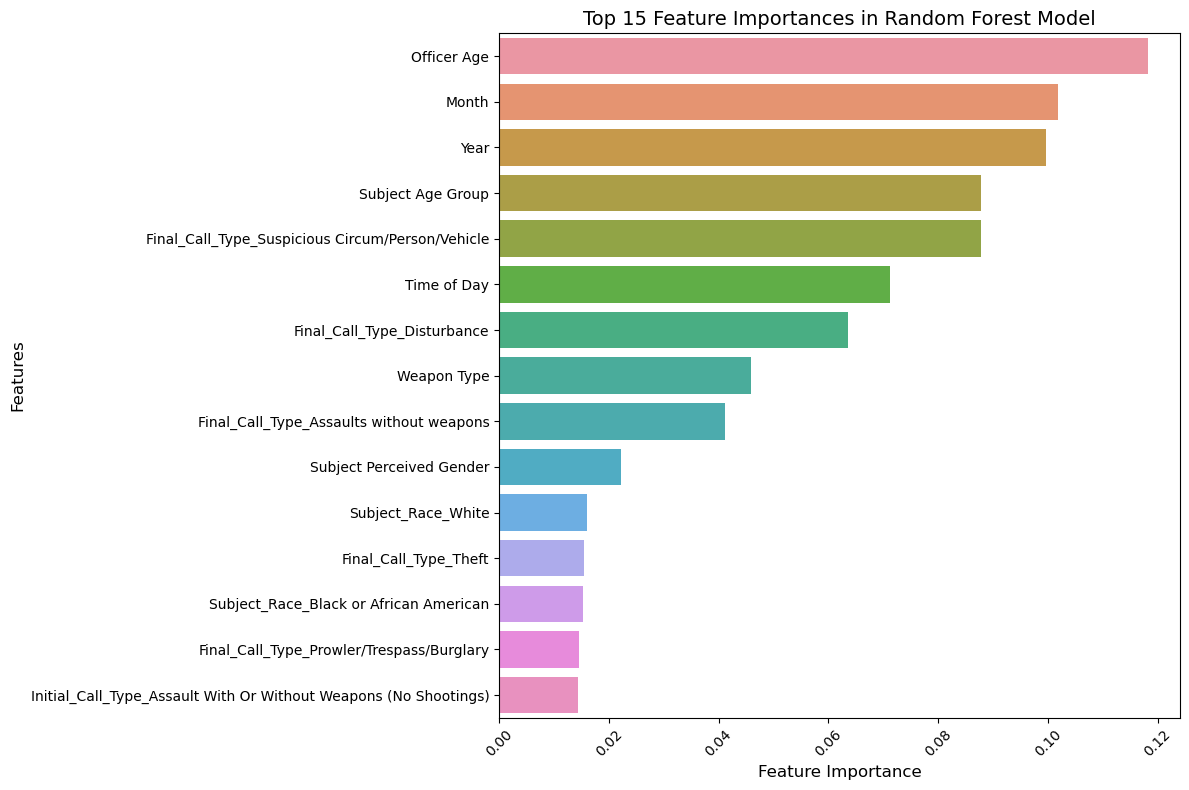

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Initialize the Random Forest model with optimized hyperparameters
rf_optimized = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)

# Fit the model on your training data
# Replace 'X_train' and 'y_train' with your actual training data variables
rf_optimized.fit(X_train_smote, y_train_smote)

# Get feature importances
importances = rf_optimized.feature_importances_

# Convert the feature importances to a pandas Series for easy plotting
features = pd.Series(importances, index=X.columns)

# Sort the features by importance and select the top 15 for a clearer plot
top_features = features.sort_values(ascending=False).head(15)

# Plotting
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
sns.barplot(x=top_features, y=top_features.index)

# Add labels and title
plt.xlabel('Feature Importance', fontsize=12)  # Adjust font size
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Feature Importances in Random Forest Model', fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout

plt.show()


Use class weights for the RandomForest model (for imbalanced data)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define class weights
# Specify weights for each class as a dictionary
# For example, if class 0 should have a weight of 1 and class 1 should have a weight of 2:
class_weights = {0: 1, 1: 2}

# Train the Random Forest model with the best hyperparameters and adjusted class weights
rf_optimized = RandomForestClassifier(
    max_depth=40,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=502,
    random_state=42,
    class_weight=class_weights,  # Set the class weights here
)
rf_optimized.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf_optimized = rf_optimized.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Optimized Random Forest with Weighted Classes:")
print(classification_report(y_test, y_pred_rf_optimized))

print("Confusion Matrix for Optimized Random Forest with Weighted Classes:")
print(confusion_matrix(y_test, y_pred_rf_optimized))


Classification Report for Optimized Random Forest with Weighted Classes:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3741
           1       0.59      0.57      0.58      1483

    accuracy                           0.77      5224
   macro avg       0.71      0.71      0.71      5224
weighted avg       0.76      0.77      0.76      5224

Confusion Matrix for Optimized Random Forest with Weighted Classes:
[[3161  580]
 [ 643  840]]


Use ADASYN for the RandomForest model (for imbalanced data)

In [104]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train_sc, y_train)
rf_classifier = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_classifier.predict(X_test_sc)

# Evaluate the model
print("Classification Report for RandomForest with ADASYN:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix for RandomForest with ADASYN:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report for RandomForest with ADASYN:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3741
           1       0.59      0.58      0.59      1483

    accuracy                           0.77      5224
   macro avg       0.71      0.71      0.71      5224
weighted avg       0.77      0.77      0.77      5224

Confusion Matrix for RandomForest with ADASYN:
[[3146  595]
 [ 620  863]]


The second best model so far: Random Forest with Random OverSampler

In [106]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the Random Over-Sampler
ros = RandomOverSampler(random_state=42)

# Apply Random Over-Sampling to the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train_sc, y_train)

# Now, you can train your RandomForestClassifier or any other model on the balanced data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)

# Train the model on the Random Over-Sampled training data
rf_classifier.fit(X_train_ros, y_train_ros)

# Predict on the test set
y_pred_rf_ros = rf_classifier.predict(X_test_sc)

# Evaluate the model
print("Classification Report for RandomForest with Random Over-Sampling:")
print(classification_report(y_test, y_pred_rf_ros))

print("Confusion Matrix for RandomForest with Random Over-Sampling:")
print(confusion_matrix(y_test, y_pred_rf_ros))


Classification Report for RandomForest with Random Over-Sampling:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3741
           1       0.58      0.61      0.59      1483

    accuracy                           0.77      5224
   macro avg       0.71      0.72      0.71      5224
weighted avg       0.77      0.77      0.77      5224

Confusion Matrix for RandomForest with Random Over-Sampling:
[[3099  642]
 [ 585  898]]


Using model Random Forest;

Hyperparameters were tuned using RandomizedSearchCV and Grid Search;

Dataset preprocessed with standardization and Random OverSampler;

Features filtered using Feature Importances (we tested different numbers, 20,30,40,all, it turns out 40 is the best);

This is the best model so far:

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from imblearn.over_sampling import RandomOverSampler

# Initialize the Random Over-Sampler
ros = RandomOverSampler(random_state=42)

# Apply Random Over-Sampling to the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train_sc, y_train)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)

# Train the model on the Random Over-Sampled training data
rf_classifier.fit(X_train_ros, y_train_ros)

# Get feature importances
importances = rf_classifier.feature_importances_

# Convert the feature importances to a pandas Series for easy plotting
features = pd.Series(importances, index=X.columns)

# Sort the features by importance and select the top 40 for a clearer plot

top_40_features = features.sort_values(ascending=False).head(40).index

# Get the integer indices of the top 40 features
top_40_feature_indices = [X.columns.get_loc(feature) for feature in top_40_features]

# Select the top 40 features from X_train_ros and X_test
X_train_top_40 = X_train_ros[:, top_40_feature_indices]
X_test_top_40 = X_test_sc[:, top_40_feature_indices]

#Train a new RandomForestClassifier or any other model using only the top 40 features
# Initialize the RandomForestClassifier
rf_classifier_top_40 = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)

# Train the model on the filtered training data
rf_classifier_top_40.fit(X_train_top_40, y_train_ros)

# Predict on the filtered test set
y_pred_rf_top_40 = rf_classifier_top_40.predict(X_test_top_40)

# Evaluate the model with the top 25 features
print("Classification Report for RandomForest with Top 40 Features:")
print(classification_report(y_test, y_pred_rf_top_40))

print("Confusion Matrix for RandomForest with Top 40 Features:")
print(confusion_matrix(y_test, y_pred_rf_top_40))

Classification Report for RandomForest with Top 40 Features:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3741
           1       0.59      0.61      0.60      1483

    accuracy                           0.77      5224
   macro avg       0.71      0.72      0.72      5224
weighted avg       0.77      0.77      0.77      5224

Confusion Matrix for RandomForest with Top 40 Features:
[[3103  638]
 [ 581  902]]


In [112]:
rf_classifier_top_40.score(X_train_top_40, y_train_ros)

0.9973262032085561

In [114]:
rf_classifier_top_40.score(X_test_top_40,y_test)

0.7666539050535988

This is the best cross-validation scores so far

In [118]:
scores = cross_val_score(rf_classifier_top_40, X_train_top_40, y_train_ros, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean score
mean_score = scores.mean()
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.86112968 0.85661765 0.8967246  0.89722594 0.90441176]
Mean cross-validation score: 0.8832219251336898


The Random Forest model shows an improvement over the baseline, with an accuracy of approximately 76.7% on the test set. The precision, recall, and f1-score for class 1 (the minority class) have improved significantly compared to the dummy classifier, which is a positive sign. However, the high training accuracy (99.7%) compared to the test accuracy indicates that the model may be overfitting to the training data. This overfitting is also hinted at by the cross-validation scores, which, while good (mean score around 88.3%), are still noticeably lower than the training score.

Despite trying various techniques like Random Over Sampling, class weights, and model tuning, the moderate performance on the test data could indeed be a limitation of the dataset itself. It might be that the features present in the dataset do not contain enough information to distinctly classify the minority class, or there might be noise in the data that's affecting model performance. Additionally, the complexity of the Random Forest model might be too high for the given data, leading to overfitting.

The complexity of the Random Forest model might be too high for the given data, leading to overfitting; let's try using the top 13 features

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from imblearn.over_sampling import RandomOverSampler

# Initialize the Random Over-Sampler
ros = RandomOverSampler(random_state=42)

# Apply Random Over-Sampling to the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train_sc, y_train)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)

# Train the model on the Random Over-Sampled training data
rf_classifier.fit(X_train_ros, y_train_ros)

# Get feature importances
importances = rf_classifier.feature_importances_

# Convert the feature importances to a pandas Series for easy plotting
features = pd.Series(importances, index=X.columns)

# Sort the features by importance and select the top 13 for a clearer plot

top_13_features = features.sort_values(ascending=False).head(13).index

# Get the integer indices of the top 10 features
top_13_feature_indices = [X.columns.get_loc(feature) for feature in top_13_features]

# Select the top 10 features from X_train_ros and X_test
X_train_top_13 = X_train_ros[:, top_13_feature_indices]
X_test_top_13 = X_test_sc[:, top_13_feature_indices]

#Train a new RandomForestClassifier or any other model using only the top 10 features
# Initialize the RandomForestClassifier
rf_classifier_top_13 = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)

# Train the model on the filtered training data
rf_classifier_top_13.fit(X_train_top_13, y_train_ros)

# Predict on the filtered test set
y_pred_rf_top_13 = rf_classifier_top_13.predict(X_test_top_13)

# Evaluate the model with the top 10 features
print("Classification Report for RandomForest with Top 13 Features:")
print(classification_report(y_test, y_pred_rf_top_13))

print("Confusion Matrix for RandomForest with Top 13 Features:")
print(confusion_matrix(y_test, y_pred_rf_top_13))

Classification Report for RandomForest with Top 13 Features:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      3741
           1       0.53      0.54      0.54      1483

    accuracy                           0.73      5224
   macro avg       0.67      0.68      0.67      5224
weighted avg       0.74      0.73      0.73      5224

Confusion Matrix for RandomForest with Top 13 Features:
[[3030  711]
 [ 680  803]]


Tuned Random Forest model with ROS and RFE with 30 selected features

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Over-Sampler
ros = RandomOverSampler(random_state=42)

# Apply Random Over-Sampling to the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train_sc, y_train)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)

# Initialize RFE with the RandomForest classifier and the desired number of features
num_features_to_select = 30  # You can adjust this number based on your requirement
rfe = RFE(rf_classifier, n_features_to_select=num_features_to_select, step=1)

# Fit RFE to the over-sampled training data
rfe.fit(X_train_ros, y_train_ros)

# Transform the training and test sets to include only the selected features
X_train_rfe = rfe.transform(X_train_ros)
X_test_rfe = rfe.transform(X_test_sc)

# Train a new RandomForestClassifier on the RFE-transformed training data
rf_classifier_rfe = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)
rf_classifier_rfe.fit(X_train_rfe, y_train_ros)

# Predict on the RFE-transformed test set
y_pred_rf_rfe = rf_classifier_rfe.predict(X_test_rfe)

# Evaluate the model with RFE applied
print("Classification Report for RandomForest with RFE:")
print(classification_report(y_test, y_pred_rf_rfe))

print("Confusion Matrix for RandomForest with RFE:")
print(confusion_matrix(y_test, y_pred_rf_rfe))


Classification Report for RandomForest with RFE:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3741
           1       0.58      0.60      0.59      1483

    accuracy                           0.77      5224
   macro avg       0.71      0.72      0.71      5224
weighted avg       0.77      0.77      0.77      5224

Confusion Matrix for RandomForest with RFE:
[[3103  638]
 [ 588  895]]


Top 30 Feature Importances in Random Forest Model Graph

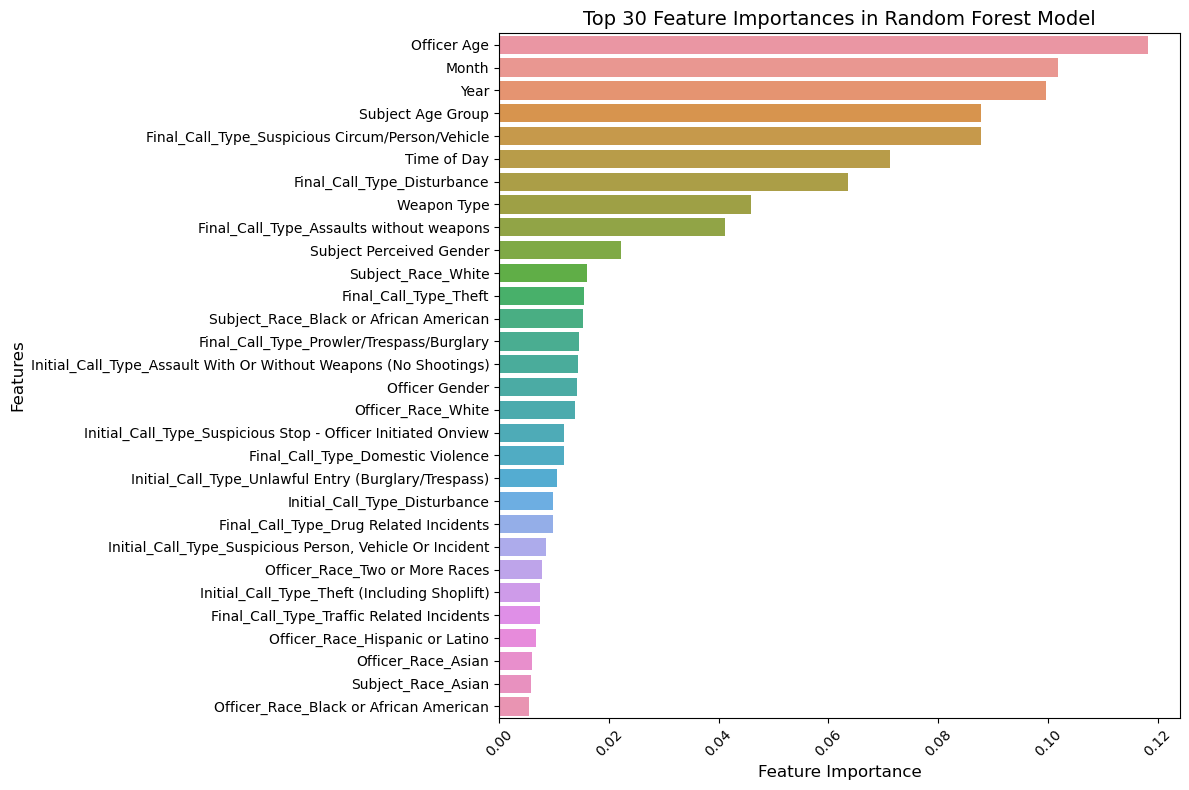

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Initialize the Random Forest model with optimized hyperparameters
rf_optimized = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)

# Fit the model on your training data
# Replace 'X_train' and 'y_train' with your actual training data variables
rf_optimized.fit(X_train_smote, y_train_smote)

# Get feature importances
importances = rf_optimized.feature_importances_

# Convert the feature importances to a pandas Series for easy plotting
features = pd.Series(importances, index=X.columns)

# Sort the features by importance and select the top 20 for a clearer plot
top_features = features.sort_values(ascending=False).head(30)

# Plotting
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
sns.barplot(x=top_features, y=top_features.index)

# Add labels and title
plt.xlabel('Feature Importance', fontsize=12)  # Adjust font size
plt.ylabel('Features', fontsize=12)
plt.title('Top 30 Feature Importances in Random Forest Model', fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout

plt.show()

In [123]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # You can adjust the contamination parameter

# Fit the model to your training data
iso_forest.fit(X_train_ros, y_train_ros)  # Assuming you're using the oversampled data

# Predict anomalies on the test set
y_pred_iso_forest = iso_forest.predict(X_test_sc)

# Since Isolation Forest returns 1 for inliers (normal) and -1 for outliers (anomalies), 
# we'll convert -1 to 1 and 1 to 0 to match your binary classification labels
y_pred_iso_forest = [1 if x == -1 else 0 for x in y_pred_iso_forest]

# Evaluate the Isolation Forest model
print("Classification Report for Isolation Forest:")
print(classification_report(y_test, y_pred_iso_forest))

print("Confusion Matrix for Isolation Forest:")
print(confusion_matrix(y_test, y_pred_iso_forest))


Classification Report for Isolation Forest:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81      3741
           1       0.23      0.04      0.07      1483

    accuracy                           0.69      5224
   macro avg       0.47      0.49      0.44      5224
weighted avg       0.57      0.69      0.60      5224

Confusion Matrix for Isolation Forest:
[[3524  217]
 [1420   63]]


Precision-Recall Curve of the Random Forest Model (fit on ROS) In the context of imbalanced datasets, the AUPRC is a more informative metric than AUROC since it focuses on the minority class. If the positive class (arrests) is much less common than the negative (no arrests), an AUPRC score of 0.605 might be a sign of decent model performance.

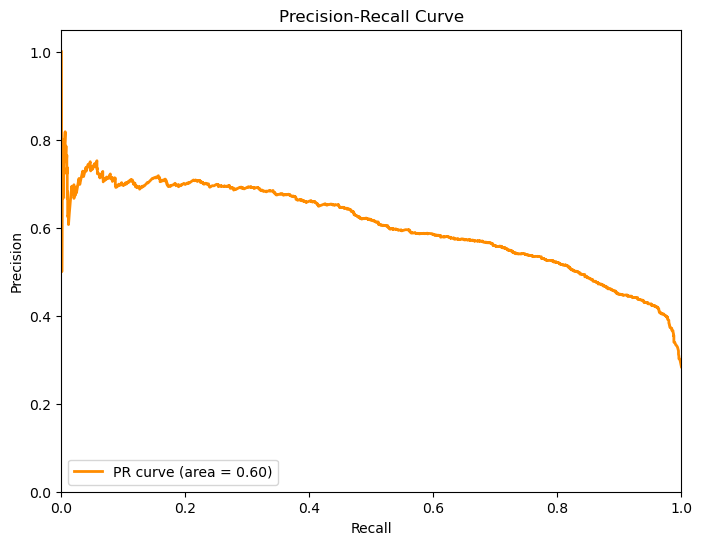

AUC-PR Score: 0.603530449361926


In [124]:
from sklearn.metrics import classification_report, confusion_matrix, auc, precision_recall_curve
import matplotlib.pyplot as plt


# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=502, random_state=42)

# Train the model on the Random Over-Sampled training data
rf_classifier.fit(X_train_ros, y_train_ros)

# Predict probabilities
predicted_probabilities = rf_classifier.predict_proba(X_test_sc)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, predicted_probabilities[:, 1])

# Calculate AUC-PR score
auc_pr_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(auc_pr_score))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Print the AUC-PR score
print("AUC-PR Score:", auc_pr_score)


The graph of precision, recall and F1-Score VS threshold

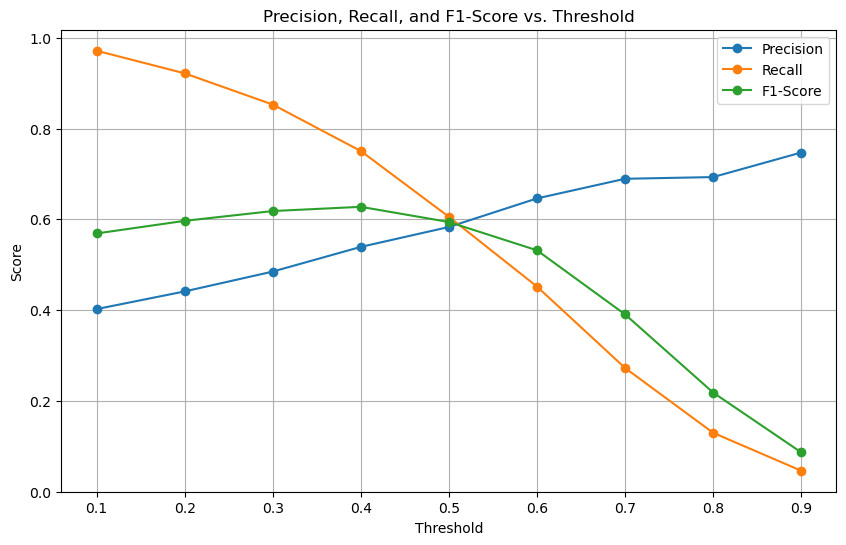

In [125]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Train your RandomForestClassifier on the Random Over-Sampled training data
rf_classifier.fit(X_train_ros, y_train_ros)

# Predict the probabilities for the positive class (class 1)
y_pred_prob_rf_ros = rf_classifier.predict_proba(X_test_sc)[:, 1]

# Create an array of candidate threshold values
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize lists to store evaluation results
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through the candidate thresholds and evaluate the model at each threshold
for threshold in thresholds:
    # Apply the threshold to convert probabilities to binary predictions
    y_pred_thresh = (y_pred_prob_rf_ros > threshold).astype(int)
    
    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    
    # Append scores to the lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


RandomForest with Random Over-Sampling and Best Class Weights

In [126]:
from sklearn.metrics import f1_score 

# Initialize the Random Over-Sampler
ros = RandomOverSampler(random_state=42)

# Apply Random Over-Sampling to the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train_sc, y_train)

# Define a range of class weights to try
class_weight_options = [{0: 1, 1: w} for w in [1, 2, 3, 4, 5]]  # Adjust the range as needed

best_f1_score = 0
best_class_weights = None

for class_weights in class_weight_options:
    # Initialize the RandomForestClassifier with class weights
    rf_classifier = RandomForestClassifier(
        max_depth=40,
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=502,
        class_weight=class_weights,  # Adjust class weights here
        random_state=42,
    )

    # Train the model on the Random Over-Sampled training data
    rf_classifier.fit(X_train_ros, y_train_ros)

    # Predict on the test set
    y_pred_rf_ros = rf_classifier.predict(X_test_sc)

    # Calculate F1-score
    current_f1_score = f1_score(y_test, y_pred_rf_ros)  # Use a different variable name

    if current_f1_score > best_f1_score:
        best_f1_score = current_f1_score
        best_class_weights = class_weights

# Re-train the model with the best class weights
rf_classifier = RandomForestClassifier(
    max_depth=40,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=502,
    class_weight=best_class_weights,  # Use the best class weights
    random_state=42,
)

rf_classifier.fit(X_train_ros, y_train_ros)

# Predict on the test set
y_pred_rf_ros = rf_classifier.predict(X_test_sc)

# Evaluate the model
print("Classification Report for RandomForest with Random Over-Sampling and Best Class Weights:")
print(classification_report(y_test, y_pred_rf_ros))

print("Confusion Matrix for RandomForest with Random Over-Sampling and Best Class Weights:")
print(confusion_matrix(y_test, y_pred_rf_ros))


Classification Report for RandomForest with Random Over-Sampling and Best Class Weights:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3741
           1       0.58      0.61      0.59      1483

    accuracy                           0.77      5224
   macro avg       0.71      0.72      0.71      5224
weighted avg       0.77      0.77      0.77      5224

Confusion Matrix for RandomForest with Random Over-Sampling and Best Class Weights:
[[3099  642]
 [ 585  898]]


**Part 6: Gradient Boosting Machine(GBM)**

Basic Gradient Boosting model fit on SMOTE datasets

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix for Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      3741
           1       0.54      0.62      0.58      1483

    accuracy                           0.74      5224
   macro avg       0.69      0.71      0.70      5224
weighted avg       0.76      0.74      0.75      5224

Confusion Matrix for Gradient Boosting:
[[2967  774]
 [ 560  923]]


Using RandomizedSearchCV to find out the best hyperparameters for the Gradiant Boosting model

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the model
gb = GradientBoostingClassifier(random_state=42)

# Define a grid of hyperparameter values
param_dist = {
    'n_estimators': sp_randint(100, 1000),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': sp_randint(3, 10),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11)
}

# Create a RandomizedSearchCV object
random_search_gb = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search_gb.fit(X_train_smote, y_train_smote)

# Best parameters and best score
best_params_gb = random_search_gb.best_params_
best_score_gb = random_search_gb.best_score_

print("Best Parameters:", best_params_gb)
print("Best Score:", best_score_gb)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 301}
Best Score: 0.8100267379679146


Using the best hyperparameters to improve the Gradient Boosting model trained on SMOTE datasets

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

# Best parameters from your RandomizedSearchCV
best_params = {
    'learning_rate': 0.2,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'min_samples_split': 3,
    'n_estimators': 301
}

# Create a new GradientBoostingClassifier with the best parameters
gb_best = GradientBoostingClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Fit the model on your training data
gb_best.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_gb_best = gb_best.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb_best))

print("Confusion Matrix for Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb_best))

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      3741
           1       0.60      0.52      0.56      1483

    accuracy                           0.77      5224
   macro avg       0.71      0.69      0.70      5224
weighted avg       0.76      0.77      0.76      5224

Confusion Matrix for Gradient Boosting:
[[3228  513]
 [ 713  770]]


Using the best hyperparameters to improve the Gradient Boosting model trained on RandomOverSampler datasets

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler


# Initialize the Random Over-Sampler
ros = RandomOverSampler(random_state=42)

# Apply Random Over-Sampling to the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train_sc, y_train)

# Best parameters from your RandomizedSearchCV
best_params = {
    'learning_rate': 0.2,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'min_samples_split': 3,
    'n_estimators': 301
}

# Create a new GradientBoostingClassifier with the best parameters
gb_best = GradientBoostingClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Fit the model on your training data
gb_best.fit(X_train_ros, y_train_ros)

# Predict on the test set
y_pred_gb_best = gb_best.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb_best))

print("Confusion Matrix for Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb_best))

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3741
           1       0.57      0.60      0.58      1483

    accuracy                           0.76      5224
   macro avg       0.70      0.71      0.70      5224
weighted avg       0.76      0.76      0.76      5224

Confusion Matrix for Gradient Boosting:
[[3058  683]
 [ 595  888]]


**Part 7:Support Vector Machine (rbf, linear, polynomial)**

SVM-rbf model fit on SMOTE datasets

In [134]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM classifier
# The default kernel is 'rbf', but you can switch it to 'linear' or 'poly' depending on your data
svm_classifier = SVC(random_state=42)

# Train the model on your training data
svm_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test_sc)

# Evaluate the model
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.89      0.64      0.75      3741
           1       0.47      0.80      0.59      1483

    accuracy                           0.69      5224
   macro avg       0.68      0.72      0.67      5224
weighted avg       0.77      0.69      0.70      5224

Confusion Matrix for SVM:
[[2408 1333]
 [ 300 1183]]


SVM-rbf using GridSearchCV to find the best hyperparameters, terrible result:
Best Parameters: {'C': 10, 'gamma': 1}
Best Score: 0.863903743315508
Classification Report for Best RBF SVM:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      3741
           1       0.50      0.27      0.35      1483

    accuracy                           0.72      5224
   macro avg       0.63      0.58      0.59      5224
weighted avg       0.68      0.72      0.69      5224

Confusion Matrix for Best RBF SVM:
[[3340  401]
 [1079  404]]

SVM-linear model fit on SMOTE datasets

In [135]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)

# Train the model
svm_linear.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_svm_linear = svm_linear.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Linear SVM:")
print(classification_report(y_test, y_pred_svm_linear))

print("Confusion Matrix for Linear SVM:")
print(confusion_matrix(y_test, y_pred_svm_linear))

Classification Report for Linear SVM:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74      3741
           1       0.46      0.78      0.58      1483

    accuracy                           0.68      5224
   macro avg       0.67      0.71      0.66      5224
weighted avg       0.76      0.68      0.70      5224

Confusion Matrix for Linear SVM:
[[2406 1335]
 [ 329 1154]]


SVM-poly model fit on SMOTE datasets

In [136]:
# Initialize the SVM classifier with a polynomial kernel
# Change the degree to see how it affects the performance
svm_poly = SVC(kernel='poly', degree=3, random_state=42)

# Train the model
svm_poly.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_svm_poly = svm_poly.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Polynomial SVM:")
print(classification_report(y_test, y_pred_svm_poly))

print("Confusion Matrix for Polynomial SVM:")
print(confusion_matrix(y_test, y_pred_svm_poly))

Classification Report for Polynomial SVM:
              precision    recall  f1-score   support

           0       0.89      0.64      0.74      3741
           1       0.47      0.79      0.59      1483

    accuracy                           0.68      5224
   macro avg       0.68      0.72      0.67      5224
weighted avg       0.77      0.68      0.70      5224

Confusion Matrix for Polynomial SVM:
[[2397 1344]
 [ 309 1174]]


**Part 8: AdaBoost(Decision Trees, Logistic Regression)**

AdaBoost using Decision Tree as the base estimator

In [137]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the AdaBoost Classifier
# By default, AdaBoost uses a Decision Tree Classifier as the base estimator
# You can change the base estimator and its parameters if needed
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

# Train the model on your training data
ada_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_ada = ada_classifier.predict(X_test_sc)

# Evaluate the model
print("Classification Report for AdaBoost:")
print(classification_report(y_test, y_pred_ada))

print("Confusion Matrix for AdaBoost:")
print(confusion_matrix(y_test, y_pred_ada))

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      3741
           1       0.49      0.68      0.57      1483

    accuracy                           0.71      5224
   macro avg       0.67      0.70      0.68      5224
weighted avg       0.75      0.71      0.72      5224

Confusion Matrix for AdaBoost:
[[2687 1054]
 [ 468 1015]]


Using GridSearchCV to find the best hyperparameters for AdaBoost(DecisionTree as base estimator):
Best Parameters: {'base_estimator__max_depth': 3, 'learning_rate': 1, 'n_estimators': 200}
Best Score: 0.7952205882352941

Train the AdaBoost model with optimized parameters

In [138]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the AdaBoost model with optimized parameters
ada_optimized = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), 
                                   learning_rate=1, 
                                   n_estimators=200, 
                                   random_state=42)
ada_optimized.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_ada_optimized = ada_optimized.predict(X_test_sc)

# Evaluate the model
print("Classification Report for Optimized AdaBoost:")
print(classification_report(y_test, y_pred_ada_optimized))
print("Confusion Matrix for Optimized AdaBoost:")
print(confusion_matrix(y_test, y_pred_ada_optimized))

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for Optimized AdaBoost:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      3741
           1       0.58      0.50      0.53      1483

    accuracy                           0.75      5224
   macro avg       0.69      0.68      0.68      5224
weighted avg       0.74      0.75      0.75      5224

Confusion Matrix for Optimized AdaBoost:
[[3203  538]
 [ 747  736]]


Initialize AdaBoost with Logistic Regression as the base estimator

In [139]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Logistic Regression as the base estimator
log_reg = LogisticRegression()

# Initialize AdaBoost with Logistic Regression as the base estimator
ada_with_logreg = AdaBoostClassifier(base_estimator=log_reg, n_estimators=50, random_state=42)

# Train the model on your training data
ada_with_logreg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_ada_logreg = ada_with_logreg.predict(X_test_sc)

# Evaluate the model
print("Classification Report for AdaBoost with Logistic Regression:")
print(classification_report(y_test, y_pred_ada_logreg))

print("Confusion Matrix for AdaBoost with Logistic Regression:")
print(confusion_matrix(y_test, y_pred_ada_logreg))

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for AdaBoost with Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.61      0.72      3741
           1       0.45      0.82      0.58      1483

    accuracy                           0.67      5224
   macro avg       0.67      0.71      0.65      5224
weighted avg       0.77      0.67      0.68      5224

Confusion Matrix for AdaBoost with Logistic Regression:
[[2277 1464]
 [ 267 1216]]


Initialize AdaBoost with Logistic Regression as the base estimator and use the tuned parameters

In [140]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Logistic Regression as the base estimator
log_reg = LogisticRegression()

# Initialize AdaBoost with Logistic Regression as the base estimator and use the tuned parameters
ada_with_logreg_tuned = AdaBoostClassifier(
    base_estimator=log_reg,
    n_estimators=100,  # Use the tuned number of estimators
    learning_rate=0.01,  # Use the tuned learning rate
    random_state=42
)

# Train the model on your training data
ada_with_logreg_tuned.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_ada_logreg_tuned = ada_with_logreg_tuned.predict(X_test_sc)

# Evaluate the model
print("Classification Report for AdaBoost with Logistic Regression (Tuned):")
print(classification_report(y_test, y_pred_ada_logreg_tuned))

print("Confusion Matrix for AdaBoost with Logistic Regression (Tuned):")
print(confusion_matrix(y_test, y_pred_ada_logreg_tuned))

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for AdaBoost with Logistic Regression (Tuned):
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      3741
           1       0.47      0.75      0.58      1483

    accuracy                           0.69      5224
   macro avg       0.67      0.71      0.67      5224
weighted avg       0.76      0.69      0.71      5224

Confusion Matrix for AdaBoost with Logistic Regression (Tuned):
[[2509 1232]
 [ 369 1114]]


Use GridSearchCV to find the best parameters for AdaBoost using Logistic Regression as base estimator:
Best Parameters: {'base_estimator__C': 10, 'learning_rate': 0.01, 'n_estimators': 100}
Best Score: 0.7268048128342246

**Part 9: k-NN**

Building basic k-NN model on SMOTE dataset

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the k-NN classifier with k = 5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the SMOTE-resampled training data
knn.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_knn = knn.predict(X_test_sc)

# Evaluate the model
print("Classification Report for k-NN:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix for k-NN:")
print(confusion_matrix(y_test, y_pred_knn))

# Cross-validation to find the optimal k
accuracy = []
for i in range(1, 31):
    knn_cv = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(knn_cv, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    accuracy.append(cv_scores.mean())

# Identifying the value of k that gives the highest accuracy
optimal_k = accuracy.index(max(accuracy)) + 1
print("Optimal value of k:", optimal_k)


Classification Report for k-NN:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      3741
           1       0.47      0.71      0.57      1483

    accuracy                           0.69      5224
   macro avg       0.66      0.70      0.66      5224
weighted avg       0.75      0.69      0.70      5224

Confusion Matrix for k-NN:
[[2539 1202]
 [ 423 1060]]
Optimal value of k: 1


In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the k-NN classifier with k = 1
knn_k1 = KNeighborsClassifier(n_neighbors=1)

# Train the model on the SMOTE-resampled training data
knn_k1.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_knn_k1 = knn_k1.predict(X_test_sc)

# Evaluate the model
print("Classification Report for k-NN with k=1:")
print(classification_report(y_test, y_pred_knn_k1))
print("Confusion Matrix for k-NN with k=1:")
print(confusion_matrix(y_test, y_pred_knn_k1))


Classification Report for k-NN with k=1:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      3741
           1       0.49      0.54      0.51      1483

    accuracy                           0.71      5224
   macro avg       0.65      0.66      0.65      5224
weighted avg       0.72      0.71      0.71      5224

Confusion Matrix for k-NN with k=1:
[[2894  847]
 [ 684  799]]


Manhattan distance is slightly better than the Euclidean distance

In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train k-NN with Euclidean distance (default)
knn_euclidean = KNeighborsClassifier(n_neighbors=5)
knn_euclidean.fit(X_train_smote, y_train_smote)
y_pred_euclidean = knn_euclidean.predict(X_test_sc)
print("Euclidean Distance - k-NN")
print("Classification Report:")
print(classification_report(y_test, y_pred_euclidean))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_euclidean))

# Initialize and train k-NN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_smote, y_train_smote)
y_pred_manhattan = knn_manhattan.predict(X_test_sc)
print("\nManhattan Distance - k-NN")
print("Classification Report:")
print(classification_report(y_test, y_pred_manhattan))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_manhattan))


Euclidean Distance - k-NN
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      3741
           1       0.47      0.71      0.57      1483

    accuracy                           0.69      5224
   macro avg       0.66      0.70      0.66      5224
weighted avg       0.75      0.69      0.70      5224

Confusion Matrix:
[[2539 1202]
 [ 423 1060]]

Manhattan Distance - k-NN
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      3741
           1       0.49      0.66      0.56      1483

    accuracy                           0.71      5224
   macro avg       0.67      0.69      0.67      5224
weighted avg       0.74      0.71      0.72      5224

Confusion Matrix:
[[2701 1040]
 [ 498  985]]


Trying around to figure out the best k value

Results for k=1:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3741
           1       0.51      0.52      0.52      1483

    accuracy                           0.72      5224
   macro avg       0.66      0.66      0.66      5224
weighted avg       0.73      0.72      0.73      5224

Confusion Matrix:
[[3010  731]
 [ 708  775]]


Results for k=2:
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      3741
           1       0.55      0.41      0.47      1483

    accuracy                           0.74      5224
   macro avg       0.67      0.64      0.65      5224
weighted avg       0.72      0.74      0.73      5224

Confusion Matrix:
[[3249  492]
 [ 870  613]]


Results for k=3:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      3741
           1       0.49

Results for k=21:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      3741
           1       0.47      0.77      0.58      1483

    accuracy                           0.68      5224
   macro avg       0.67      0.71      0.66      5224
weighted avg       0.76      0.68      0.70      5224

Confusion Matrix:
[[2425 1316]
 [ 337 1146]]


Results for k=22:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.75      3741
           1       0.47      0.74      0.57      1483

    accuracy                           0.69      5224
   macro avg       0.67      0.70      0.66      5224
weighted avg       0.75      0.69      0.70      5224

Confusion Matrix:
[[2499 1242]
 [ 384 1099]]


Results for k=23:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74      3741
           1       0

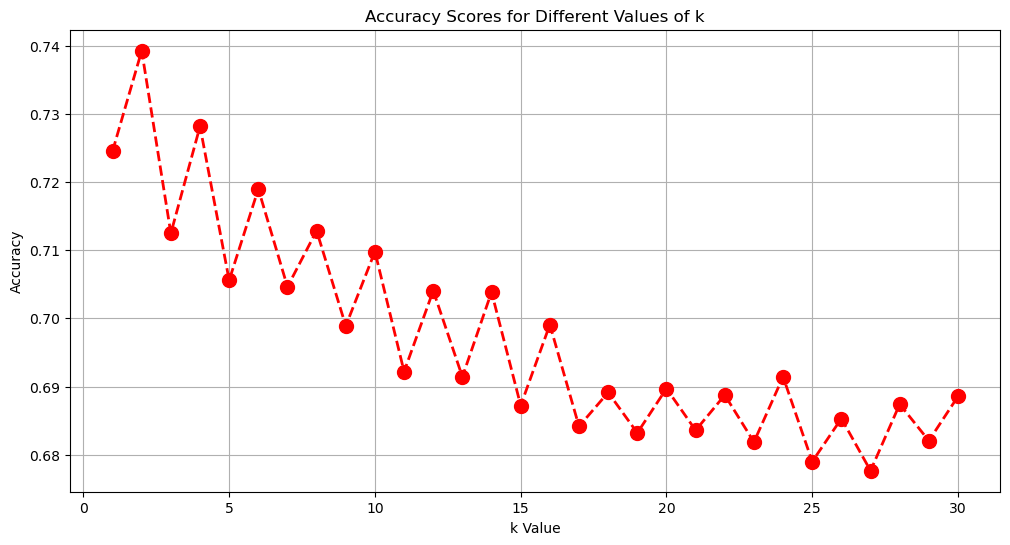

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Range of k values to try
k_values = range(1, 31)
accuracy_scores = []

for k in k_values:
    # Initialize and train k-NN with Manhattan distance and current k value
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = knn.predict(X_test_sc)

    # Calculate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Optional: Print classification report and confusion matrix for each k
    print(f"Results for k={k}:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Plotting accuracy scores over different values of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy_scores, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=10)
plt.title('Accuracy Scores for Different Values of k')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


The best k value is 3

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the k-NN classifier with k = 3 and Manhattan distance
knn_final = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Train the model on the SMOTE-resampled training data
knn_final.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_final = knn_final.predict(X_test_sc)

# Evaluate the model
print("Final Model with k=3 - Manhattan Distance")
print("Classification Report:")
print(classification_report(y_test, y_pred_final))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))


Final Model with k=3 - Manhattan Distance
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      3741
           1       0.49      0.62      0.55      1483

    accuracy                           0.71      5224
   macro avg       0.66      0.69      0.67      5224
weighted avg       0.74      0.71      0.72      5224

Confusion Matrix:
[[2797  944]
 [ 558  925]]


**Part 10: Ensemble Methods**

(ROS)Combo No.1: Gradient Boosting, Random Forest, SVM-rbf.

In [148]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


#Support Vector Machine-rbf
svm_classifier = SVC(probability=True, random_state=42)

# Gradient Boosting Classifier
gb_best_params = {
    'learning_rate': 0.2,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'min_samples_split': 3,
    'n_estimators': 301
}
gb_best = GradientBoostingClassifier(
    learning_rate=gb_best_params['learning_rate'],
    max_depth=gb_best_params['max_depth'],
    min_samples_leaf=gb_best_params['min_samples_leaf'],
    min_samples_split=gb_best_params['min_samples_split'],
    n_estimators=gb_best_params['n_estimators'],
    random_state=42
)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(
    max_depth=40,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=502,
    random_state=42
)

# Soft Voting Classifier with all four models
voting_clf_combo1 = VotingClassifier(
    estimators=[
        ('gb', gb_best),
        ('rf', rf_classifier),
        ('svm_rbf',svm_classifier)
    ],
    voting='soft'
)
voting_clf_combo1.fit(X_train_ros, y_train_ros)

# Predict on the scaled test set
y_pred_voting = voting_clf_combo1.predict(X_test_sc)

# Evaluate the ensemble model
print("Classification Report for Soft Voting Ensemble:")
print(classification_report(y_test, y_pred_voting))

print("Confusion Matrix for Soft Voting Ensemble:")
print(confusion_matrix(y_test, y_pred_voting))

Classification Report for Soft Voting Ensemble:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      3741
           1       0.56      0.67      0.61      1483

    accuracy                           0.76      5224
   macro avg       0.71      0.73      0.72      5224
weighted avg       0.78      0.76      0.77      5224

Confusion Matrix for Soft Voting Ensemble:
[[2972  769]
 [ 487  996]]


In [150]:
scores = cross_val_score(voting_clf_combo1, X_train_ros, y_train_ros, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

mean_score = scores.mean()
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.85160428 0.85127005 0.88335561 0.88218583 0.88937166]
Mean cross-validation score: 0.871557486631016


(SMOTE) Combo No.1: Gradient Boosting, Random Forest, SVM-rbf. NOTE: The best ensemble methods combination.

In [149]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


#Support Vector Machine-rbf
svm_classifier = SVC(probability=True, random_state=42)

# Gradient Boosting Classifier
gb_best_params = {
    'learning_rate': 0.2,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'min_samples_split': 3,
    'n_estimators': 301
}
gb_best = GradientBoostingClassifier(
    learning_rate=gb_best_params['learning_rate'],
    max_depth=gb_best_params['max_depth'],
    min_samples_leaf=gb_best_params['min_samples_leaf'],
    min_samples_split=gb_best_params['min_samples_split'],
    n_estimators=gb_best_params['n_estimators'],
    random_state=42
)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(
    max_depth=40,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=502,
    random_state=42
)

# Soft Voting Classifier with all four models
voting_clf_combo1s = VotingClassifier(
    estimators=[
        ('gb', gb_best),
        ('rf', rf_classifier),
        ('svm_rbf',svm_classifier)
    ],
    voting='soft'
)
voting_clf_combo1s.fit(X_train_smote, y_train_smote)

# Predict on the scaled test set
y_pred_voting = voting_clf_combo1s.predict(X_test_sc)

# Evaluate the ensemble model
print("Classification Report for Soft Voting Ensemble:")
print(classification_report(y_test, y_pred_voting))

print("Confusion Matrix for Soft Voting Ensemble:")
print(confusion_matrix(y_test, y_pred_voting))

Classification Report for Soft Voting Ensemble:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      3741
           1       0.58      0.62      0.60      1483

    accuracy                           0.77      5224
   macro avg       0.71      0.72      0.72      5224
weighted avg       0.77      0.77      0.77      5224

Confusion Matrix for Soft Voting Ensemble:
[[3078  663]
 [ 557  926]]


In [151]:
scores = cross_val_score(voting_clf_combo1s, X_train_ros, y_train_ros, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

mean_score = scores.mean()
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.85160428 0.85127005 0.88335561 0.88218583 0.88937166]
Mean cross-validation score: 0.871557486631016


(ROS)Combo No.2: Gradient Boosting, AdaBoost, SVM-RBF, using ROS datasets

In [2210]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


#Support Vector Machine-rbf
svm_classifier = SVC(probability=True, random_state=42)

# Gradient Boosting Classifier
gb_best_params = {
    'learning_rate': 0.2,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'min_samples_split': 3,
    'n_estimators': 301
}
gb_best = GradientBoostingClassifier(
    learning_rate=gb_best_params['learning_rate'],
    max_depth=gb_best_params['max_depth'],
    min_samples_leaf=gb_best_params['min_samples_leaf'],
    min_samples_split=gb_best_params['min_samples_split'],
    n_estimators=gb_best_params['n_estimators'],
    random_state=42
)

# AdaBoost Classifier
ada_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    learning_rate=1,
    n_estimators=200,
    random_state=42
)

# Soft Voting Classifier with all four models
voting_clf_combo2 = VotingClassifier(
    estimators=[
        ('gb', gb_best),
        ('ada', ada_classifier),
        ('svm_rbf',svm_classifier)
    ],
    voting='soft'
)
voting_clf_combo2.fit(X_train_ros, y_train_ros)

# Predict on the scaled test set
y_pred_voting = voting_clf_combo2.predict(X_test_sc)

# Evaluate the ensemble model
print("Classification Report for Soft Voting Ensemble:")
print(classification_report(y_test, y_pred_voting))

print("Confusion Matrix for Soft Voting Ensemble:")
print(confusion_matrix(y_test, y_pred_voting))

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report for Soft Voting Ensemble:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      3741
           1       0.58      0.62      0.60      1483

    accuracy                           0.76      5224
   macro avg       0.71      0.72      0.72      5224
weighted avg       0.77      0.76      0.77      5224

Confusion Matrix for Soft Voting Ensemble:
[[3061  680]
 [ 557  926]]


Combo No.3: Random Forest, SVM-RBF, k-NN, using ROS datasets

In [154]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


#Support Vector Machine-rbf
svm_classifier = SVC(probability=True, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(
    max_depth=40,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=502,
    random_state=42
)

# k-NN Classifier with k=3 and Manhattan distance
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Soft Voting Classifier with all four models
voting_clf_combo3 = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('knn', knn_classifier),
        ('svm_rbf',svm_classifier)
    ],
    voting='soft'
)
voting_clf_combo3.fit(X_train_ros, y_train_ros)

# Predict on the scaled test set
y_pred_voting = voting_clf_combo3.predict(X_test_sc)

# Evaluate the ensemble model
print("Classification Report for Soft Voting Ensemble:")
print(classification_report(y_test, y_pred_voting))

print("Confusion Matrix for Soft Voting Ensemble:")
print(confusion_matrix(y_test, y_pred_voting))

Classification Report for Soft Voting Ensemble:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      3741
           1       0.52      0.67      0.59      1483

    accuracy                           0.73      5224
   macro avg       0.69      0.71      0.69      5224
weighted avg       0.76      0.73      0.74      5224

Confusion Matrix for Soft Voting Ensemble:
[[2818  923]
 [ 482 1001]]


**Part 11: Interpretation using Partial Dependence Plots (PDPs)**

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

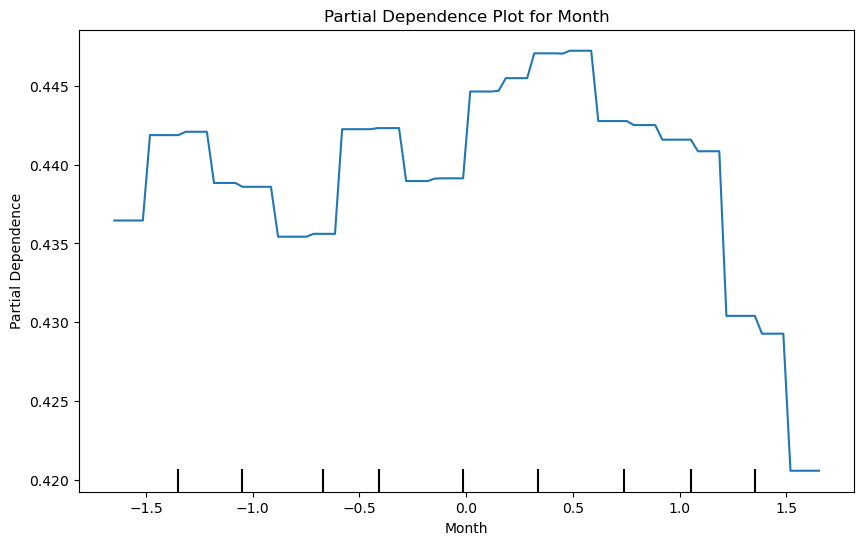

In [155]:
feature_names = df_filtered_4.drop('Stop Resolution', axis=1).columns.tolist()
X_train_smote_df = pd.DataFrame(X_train_smote, columns=feature_names)
selected_features = ['Officer Age', 'Month', 'Year',
       'Final_Call_Type_Suspicious Circum/Person/Vehicle', 'Subject Age Group',
       'Time of Day', 'Final_Call_Type_Disturbance',
       'Final_Call_Type_Assaults without weapons', 'Weapon Type',
       'Subject Perceived Gender', 'Officer Gender', 'Subject_Race_White',
       'Subject_Race_Black or African American', 'Officer_Race_White',
       'Initial_Call_Type_Assault With Or Without Weapons (No Shootings)',
       'Final_Call_Type_Theft', 'Final_Call_Type_Prowler/Trespass/Burglary',
       'Initial_Call_Type_Suspicious Stop - Officer Initiated Onview',
       'Final_Call_Type_Domestic Violence',
       'Final_Call_Type_Drug Related Incidents',
       'Initial_Call_Type_Unlawful Entry (Burglary/Trespass)',
       'Initial_Call_Type_Disturbance',
       'Initial_Call_Type_Suspicious Person, Vehicle Or Incident',
       'Officer_Race_Two or More Races', 'Officer_Race_Hispanic or Latino',
       'Final_Call_Type_Traffic Related Incidents',
       'Initial_Call_Type_Theft (Including Shoplift)', 'Officer_Race_Asian',
       'Subject_Race_Asian', 'Officer_Race_Black or African American',
       'Subject_Race_American Indian or Alaska Native',
       'Initial_Call_Type_Fight Without Weapons',
       'Initial_Call_Type_Traffic Incidents - Dui And Mvc Involving Hit And Run/Injuries',
       'Final_Call_Type_Person With Weapon', 'Subject_Race_Hispanic',
       'Initial_Call_Type_Drug Related Incidents',
       'Initial_Call_Type_Potential Safety Threats (Physical/Verbal)',
       'Initial_Call_Type_Assault With Shooting',
       'Initial_Call_Type_Traffic Stop - Officer Initiated Onview',
       'Initial_Call_Type_Robbery (Includes Strong Arm)'] # Replace with the actual feature names

# Adjust X_train_smote_df to only include these selected features
X_train_smote_df_selected = X_train_smote_df[selected_features]

from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Generate the partial dependence plot for the "Officer Age" feature
feature_to_plot = 'Month'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_classifier_top_40, X_train_smote_df_selected, [feature_to_plot], ax=ax)

# Enhance the plot display
plt.title(f'Partial Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Partial Dependence')

# Show the plot
plt.show()

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

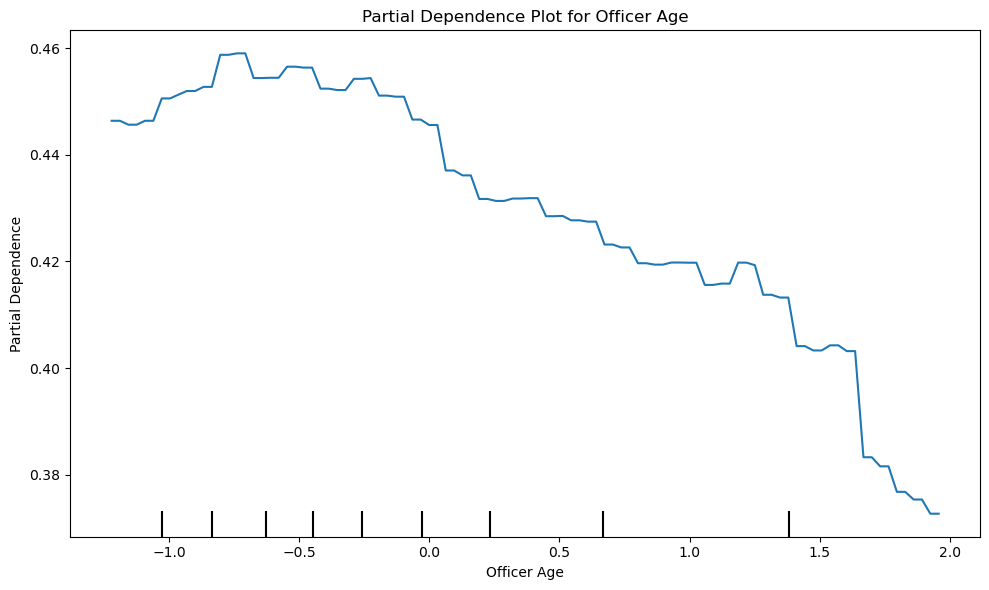

In [156]:
# Generate the partial dependence plot for the "Officer Age" feature
feature_to_plot = 'Officer Age'

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_classifier_top_40, X_train_smote_df_selected, [feature_to_plot], ax=ax)

plt.title(f'Partial Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

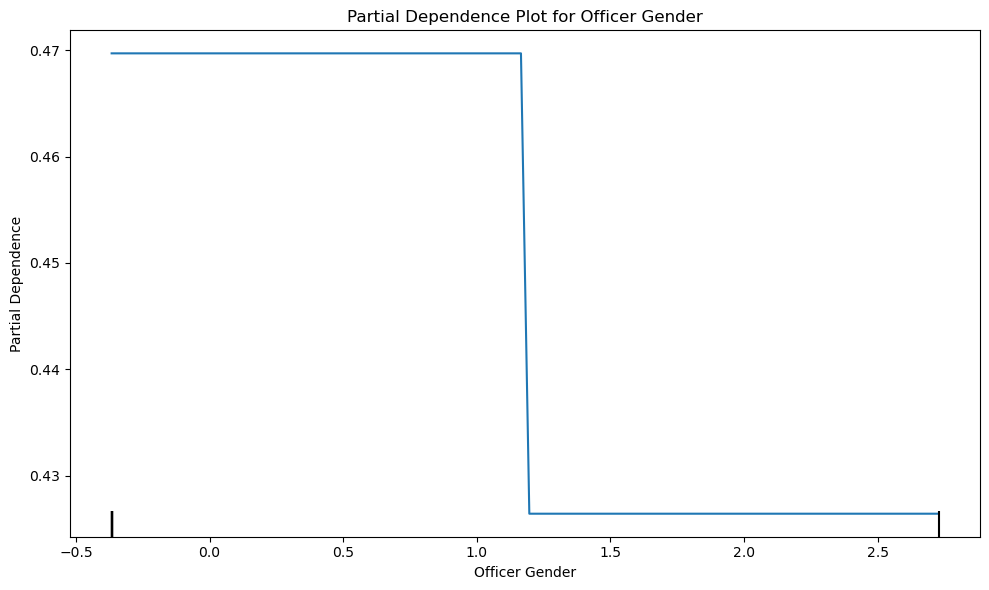

In [157]:
feature_to_plot = 'Officer Gender'

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_classifier_top_40, X_train_smote_df_selected, [feature_to_plot], ax=ax)

plt.title(f'Partial Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

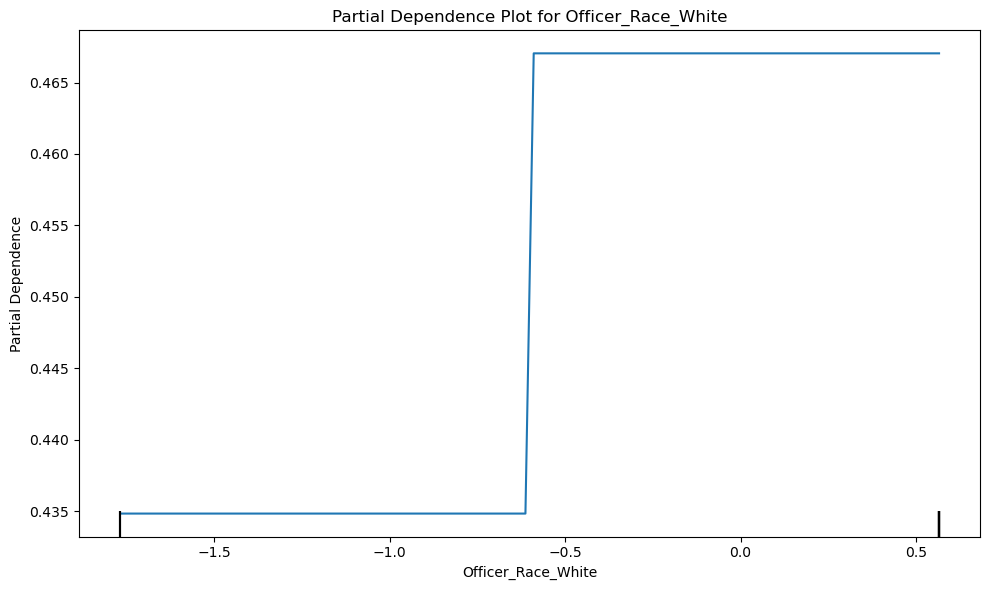

In [158]:
feature_to_plot = 'Officer_Race_White'

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_classifier_top_40, X_train_smote_df_selected, [feature_to_plot], ax=ax)

plt.title(f'Partial Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


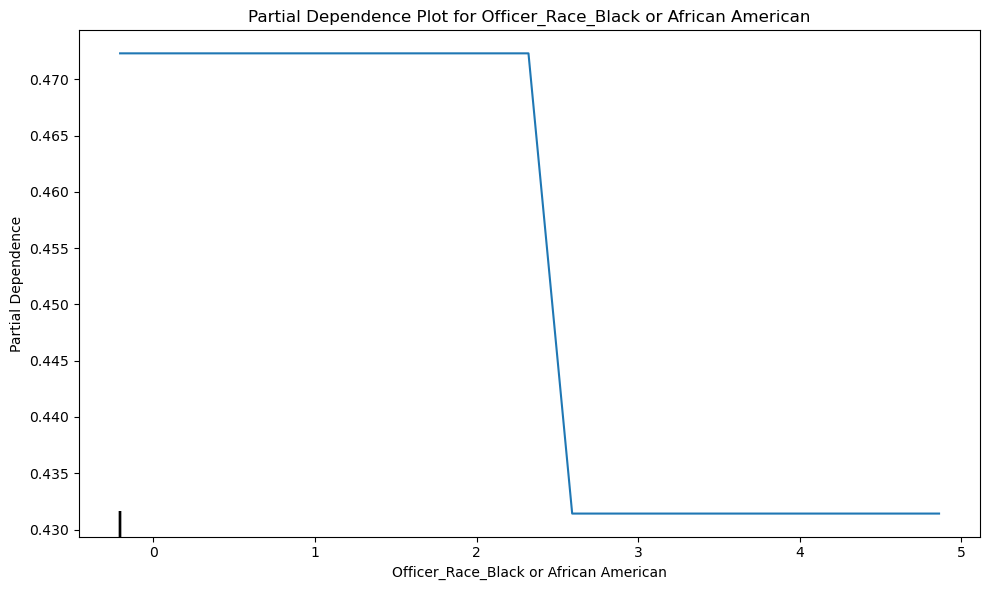

In [159]:
feature_to_plot = 'Officer_Race_Black or African American'

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_classifier_top_40, X_train_smote_df_selected, [feature_to_plot], ax=ax)

plt.title(f'Partial Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

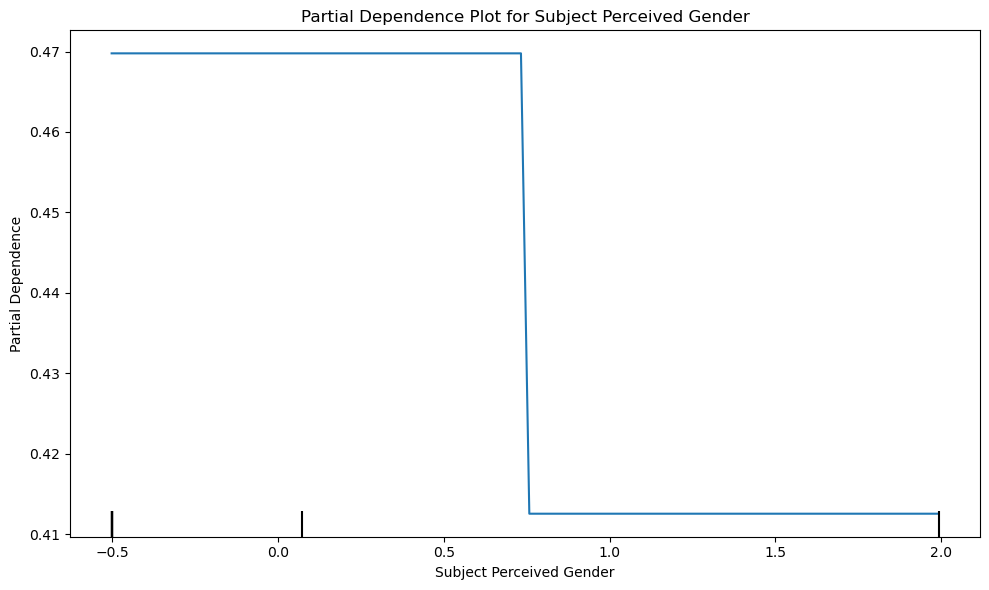

In [160]:
feature_to_plot = 'Subject Perceived Gender'

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_classifier_top_40, X_train_smote_df_selected, [feature_to_plot], ax=ax)

plt.title(f'Partial Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

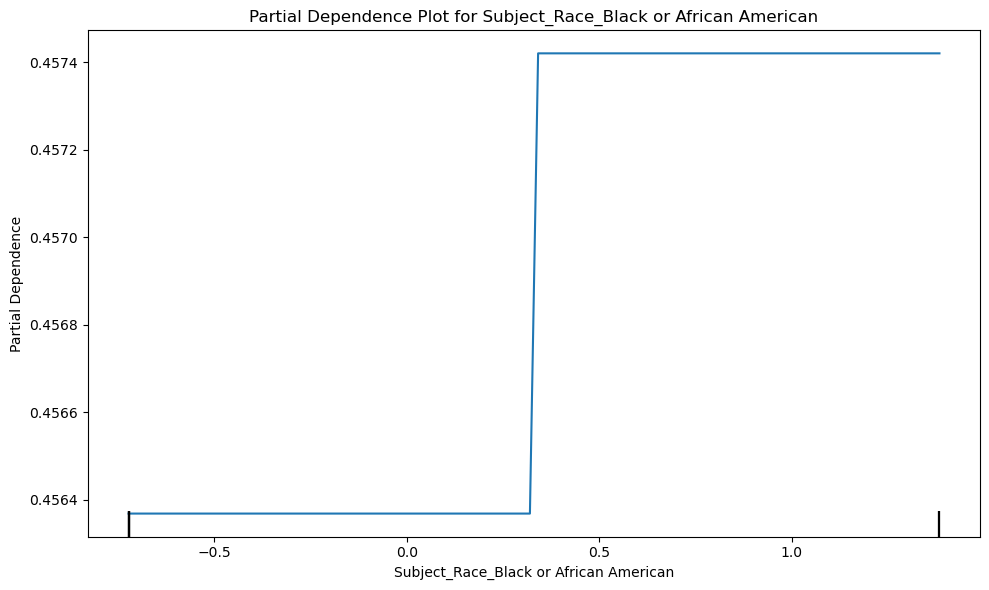

In [161]:
feature_to_plot = 'Subject_Race_Black or African American'

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_classifier_top_40, X_train_smote_df_selected, [feature_to_plot], ax=ax)

plt.title(f'Partial Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

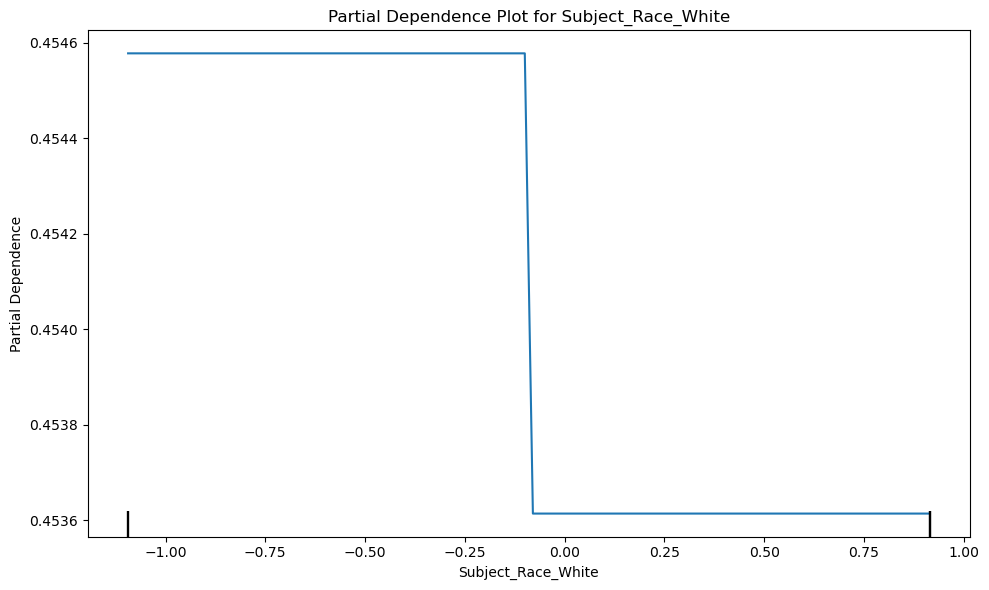

In [162]:
feature_to_plot = 'Subject_Race_White'

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_classifier_top_40, X_train_smote_df_selected, [feature_to_plot], ax=ax)

plt.title(f'Partial Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

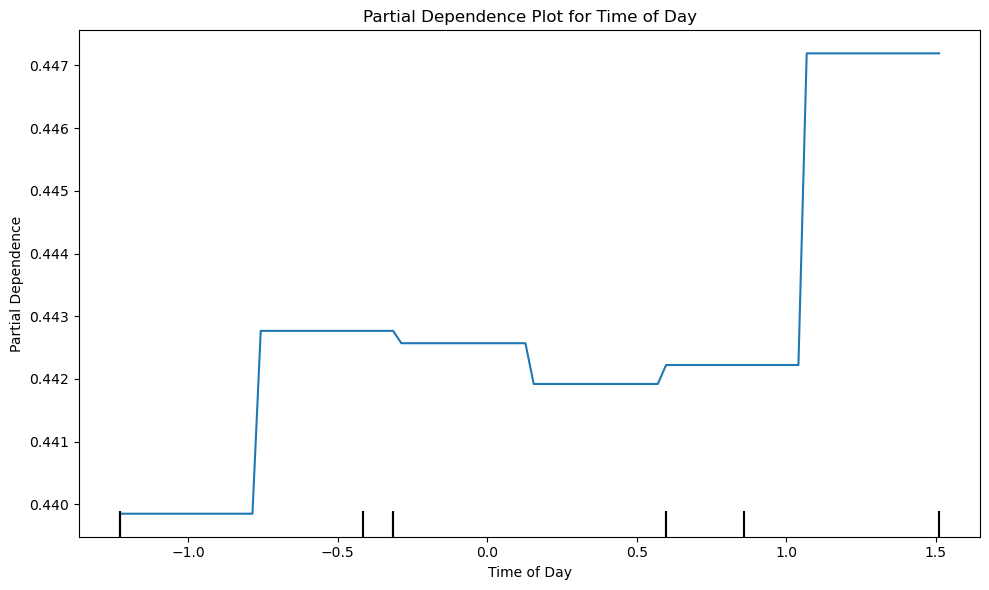

In [163]:
feature_to_plot = 'Time of Day'

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_classifier_top_40, X_train_smote_df_selected, [feature_to_plot], ax=ax)

plt.title(f'Partial Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yiyiluo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:

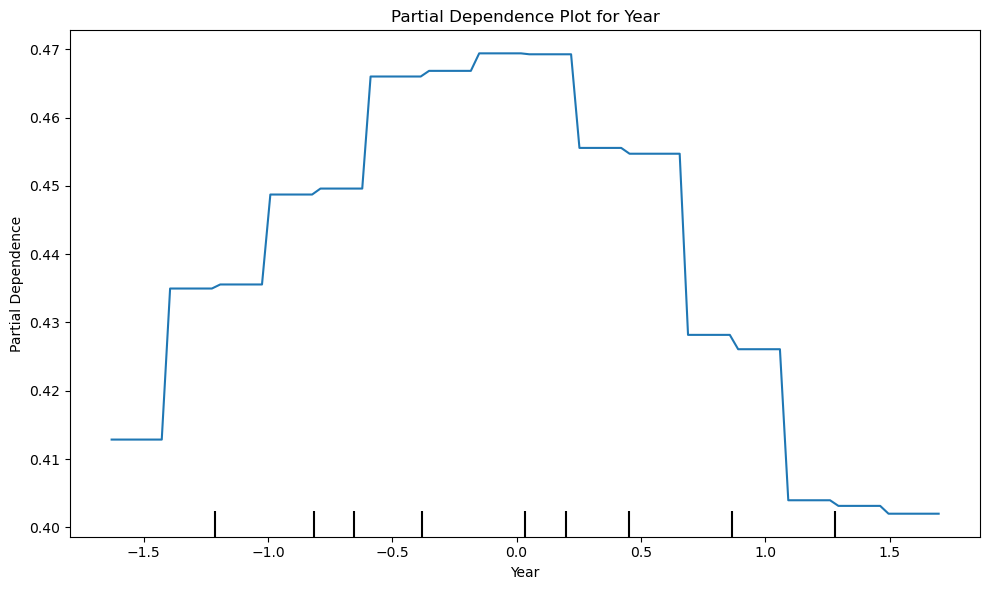

In [164]:
feature_to_plot = 'Year'

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_classifier_top_40, X_train_smote_df_selected, [feature_to_plot], ax=ax)

plt.title(f'Partial Dependence Plot for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

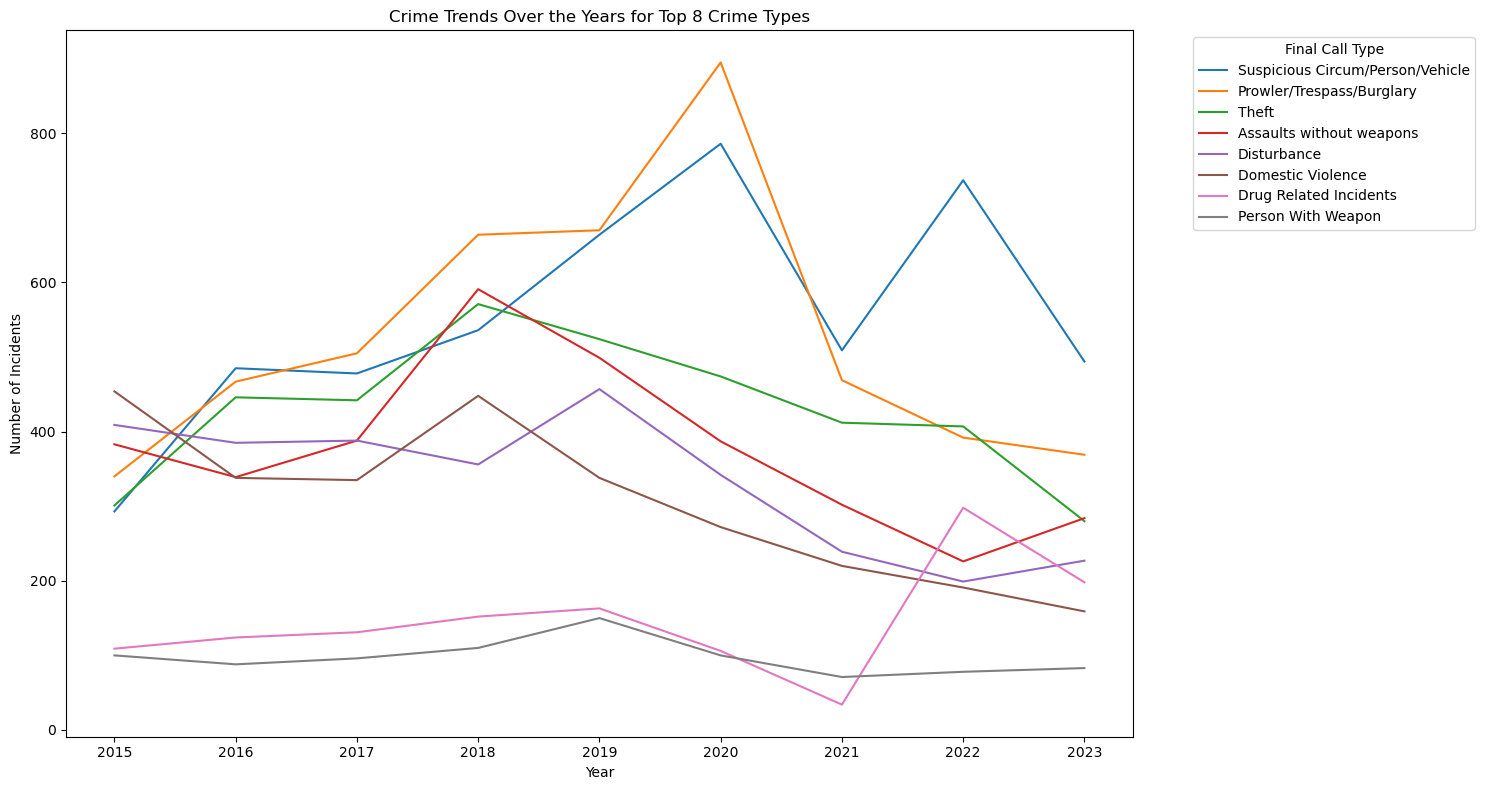

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'df_filtered_2.csv'
df = pd.read_csv(file_path)

# Group by 'Year' and 'Final Call Type' and count the occurrences
crime_trends = df.groupby(['Year', 'Final Call Type']).size().unstack(fill_value=0)

# Select the top 8 most frequent crime types over all years
top_crime_types = crime_trends.sum().sort_values(ascending=False).head(8).index

# Filter the dataset to include only the top 8 crime types
crime_trends_filtered = crime_trends[top_crime_types]

# Reset index so 'Year' is a column again
crime_trends_filtered.reset_index(inplace=True)

# Melting the DataFrame to have a suitable form for seaborn lineplot
crime_trends_melted = crime_trends_filtered.melt(id_vars='Year', var_name='Final Call Type', value_name='Incident Count')

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a lineplot
sns.lineplot(data=crime_trends_melted, x='Year', y='Incident Count', hue='Final Call Type')

# Add title and labels
plt.title('Crime Trends Over the Years for Top 8 Crime Types')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Final Call Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

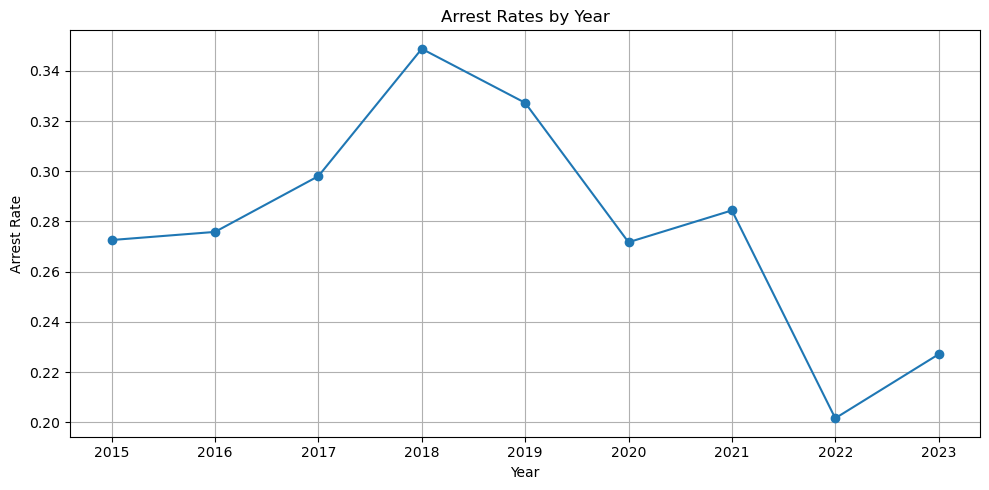

In [166]:
# Define a new column for arrest flag (1 if arrest, 0 otherwise)
df['Arrest Flag'] = (df['Stop Resolution'] == 'Arrest').astype(int)

# Calculate the arrest rate by year
arrest_rate_by_year = df.groupby('Year')['Arrest Flag'].mean()

# Convert the Series to DataFrame for easier plotting
arrest_rate_by_year_df = arrest_rate_by_year.reset_index()

# Plot the arrest rates
plt.figure(figsize=(10, 5))
plt.plot(arrest_rate_by_year_df['Year'], arrest_rate_by_year_df['Arrest Flag'], marker='o')

# Add title and labels
plt.title('Arrest Rates by Year')
plt.xlabel('Year')
plt.ylabel('Arrest Rate')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [1]:
import shap
# Create a SHAP Tree Explainer for the RandomForest model
explainer = shap.TreeExplainer(rf_classifier_top_13)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_top_13)
shap.summary_plot(shap_values, X_test_top_13, feature_names=top_13_features)
shap.force_plot(explainer.expected_value[1], shap_values[1][:13], X_test_top_13.iloc[:13])
shap.dependence_plot('Subject_Race_Black or African American', shap_values[1], X_test_top_13, feature_names=top_13_features)

NameError: name 'rf_classifier_top_13' is not defined